## Phase 3 Project Submission

| Student Pace             | Project Review Date  | Instructor Name     | Blog Post URL  |
|--------------------------|--------------------------|---------------------|----------------|
| *Part Time*                | *October 23rd, 2023*     | *Stella Waithera*     | https://github.com/figmulberry/phase-iii-project             |

**Student Name:** `Moses Thiong'o`

In [1]:
# Importing the required modules: They will be imported as needed
# import numpy as np
# import seaborn as sns
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
import tabulate

%matplotlib inline
%run modules.py
# %run functions.py
# %load modules.py

## **DATASET LOADING**

These include the following datasets:

- The Training values - which are the Predictors;
- The Test values and
- The Train Labels

In [2]:
# Creating the DataFrames for the CSV data files
# submission_format = pd.read_csv("data\Submission format.csv", index_col=0) # The submission format file
train_labels = pd.read_csv("data\Training set labels.csv") # Training Set Labels data
train_values = pd.read_csv("data\Training set values.csv") # Training Set Values
test_values = pd.read_csv("data\Test Set Values.csv")

## **EXPLORATORY DATA ANALYSIS**

Here, we shall look at the basics of the data e.g., (shape, columns, head, description, checking nulls e.t.c). We will also be guided by the the requirements of the model such as sensitivity to outliers - we shall check for outliers.

In [3]:
# Loading the Training Set Values data
train_values.head(2)

id  amount_tsh date_recorded   funder  gps_height installer  longitude  \
0  69572      6000.0     3/14/2011    Roman        1390     Roman  34.938093   
1   8776         0.0      3/6/2013  Grumeti        1399   GRUMETI  34.698766   

   latitude  wpt_name  num_private  ... payment_type water_quality  \
0 -9.856322      none            0  ...     annually          soft   
1 -2.147466  Zahanati            0  ...    never pay          soft   

  quality_group      quantity  quantity_group                source  \
0          good        enough          enough                spring   
1          good  insufficient    insufficient  rainwater harvesting   

            source_type  source_class     waterpoint_type  \
0                spring   groundwater  communal standpipe   
1  rainwater harvesting       surface  communal standpipe   

  waterpoint_type_group  
0    communal standpipe  
1    communal standpipe  

[2 rows x 40 columns]

In [4]:
# A snapshot of the train labels data
train_labels.head(2)

id status_group
0  69572   functional
1   8776   functional

In [5]:
# train_values.shape, test_values.shape
print(f"Training Values shape: {train_values.shape},\n"
      f"Test Values shape: {test_values.shape}")

Training Values shape: (59400, 40),
Test Values shape: (14850, 40)


In [6]:
# Check the data types and schema for the Train Set Values data
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
# Examining the missing values in the Training Set Values
train_values.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [8]:
# Printing the general data statistics for the Training Set values data
train_values.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean       0.474141     15.297003       5.629747    179.909983   
std       12.236230     17.587406       9.633649    471.482176   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     25.000000   
75%        0.000000     17.000000       5.000000    215.000000   
max     1776.000000     99.000000      80.000000  30500.000000   

       construction_year  
count       59400.000000  
mean         1300.652475  
std           951.620547  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

In [9]:
# Check the data types and schema for the Test Set Values data
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14850 non-null  int64  
 1   amount_tsh             14850 non-null  float64
 2   date_recorded          14850 non-null  object 
 3   funder                 13981 non-null  object 
 4   gps_height             14850 non-null  int64  
 5   installer              13973 non-null  object 
 6   longitude              14850 non-null  float64
 7   latitude               14850 non-null  float64
 8   wpt_name               14850 non-null  object 
 9   num_private            14850 non-null  int64  
 10  basin                  14850 non-null  object 
 11  subvillage             14751 non-null  object 
 12  region                 14850 non-null  object 
 13  region_code            14850 non-null  int64  
 14  district_code          14850 non-null  int64  
 15  lg

In [10]:
# Examining the missing values in the Test Set Values
test_values.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                    869
gps_height                  0
installer                 877
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
subvillage                 99
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
public_meeting            821
recorded_by                 0
scheme_management         969
scheme_name              7092
permit                    737
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity  

In [11]:
# Printing the general data statistics for the Test Set values data
test_values.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  14850.000000   14850.000000  14850.000000  14850.000000  1.485000e+04   
mean   37161.972929     322.826983    655.147609     34.061605 -5.684724e+00   
std    21359.364833    2510.968644    691.261185      6.593034  2.940803e+00   
min       10.000000       0.000000    -57.000000      0.000000 -1.156459e+01   
25%    18727.000000       0.000000      0.000000     33.069455 -8.443970e+00   
50%    37361.500000       0.000000    344.000000     34.901215 -5.049750e+00   
75%    55799.750000      25.000000   1308.000000     37.196594 -3.320594e+00   
max    74249.000000  200000.000000   2777.000000     40.325016 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  14850.000000  14850.000000   14850.000000  14850.000000   
mean       0.415084     15.139057       5.626397    184.114209   
std        8.167910     17.191329       9.673842    469.499332   
min        0.000000      1.000000       0.000000      0.000000   
25%        0.000000      5.000000       2.000000      0.000000   
50%        0.000000     12.000000       3.000000     20.000000   
75%        0.000000     17.000000       5.000000    220.000000   
max      669.000000     99.000000      80.000000  11469.000000   

       construction_year  
count       14850.000000  
mean         1289.708350  
std           955.241087  
min             0.000000  
25%             0.000000  
50%          1986.000000  
75%          2004.000000  
max          2013.000000

The test values data has 14,850 records with a population of 11,469 who are served by the water pumps.

In [12]:
uniq_vals_cnt = {column: train_values[column].nunique() for column in train_values.columns}

# Convert the dictionary to a pandas DataFrame
table = pd.DataFrame(uniq_vals_cnt.items(), columns=['Column Name', 'Unique Values Count'])

# Sort the table by the 'Unique Values Count' column in ascending order
table = table.sort_values('Unique Values Count', ascending=False)

# Print the table minus the index column
print(table.to_string(index=False))

           Column Name  Unique Values Count
                    id                59400
              latitude                57517
             longitude                57516
              wpt_name                37400
            subvillage                19287
           scheme_name                 2696
            gps_height                 2428
             installer                 2145
                  ward                 2092
                funder                 1897
            population                 1049
         date_recorded                  356
                   lga                  125
            amount_tsh                   98
           num_private                   65
     construction_year                   55
           region_code                   27
                region                   21
         district_code                   20
       extraction_type                   18
 extraction_type_group                   13
            management          

In [13]:
# Creating a copy of train_values DataFrame so that we don't alter the main df
train_values_copy = train_values.copy()

# Converting "date_recorded" column to a datetime type in train_values_copy
train_values_copy['date_recorded'] = pd.to_datetime(train_values_copy['date_recorded'])

# Creating a new DataFrame by merging train_values_copy and train_labels
merged_df = train_values_copy.merge(train_labels, on='id')

# Creating a new column "month" & "year" from the date_recorded column in merged_df
merged_df['month'] = merged_df['date_recorded'].dt.month
merged_df['year'] = merged_df['date_recorded'].dt.year

In [14]:
# Display the modified df
merged_df.head(2)

id  amount_tsh date_recorded   funder  gps_height installer  longitude  \
0  69572      6000.0    2011-03-14    Roman        1390     Roman  34.938093   
1   8776         0.0    2013-03-06  Grumeti        1399   GRUMETI  34.698766   

   latitude  wpt_name  num_private  ...      quantity quantity_group  \
0 -9.856322      none            0  ...        enough         enough   
1 -2.147466  Zahanati            0  ...  insufficient   insufficient   

                 source           source_type  source_class  \
0                spring                spring   groundwater   
1  rainwater harvesting  rainwater harvesting       surface   

      waterpoint_type waterpoint_type_group  status_group month  year  
0  communal standpipe    communal standpipe    functional     3  2011  
1  communal standpipe    communal standpipe    functional     3  2013  

[2 rows x 43 columns]

In [15]:
merged_df['year'].value_counts()

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: year, dtype: int64

For Geographical location, plotting the areas in the correct spatial point on the ground helps to improve accuracy. In our case, having the water pump points that are spatially mapped in the Null Island means that they are misplaced. Null Island is an imaginary island located at 0°N 0°E (hence “Null”) in the South Atlantic Ocean. This point is where the Equator meets the Prime Meridian.

In the code cells below, we will check whether there are any rows for the Latitude and Longitude columns which have 0,0 values. If there are any, we shall then count them to know how many water pumps will be removed if need be.


In [16]:
""" 
We are checking whether there are any potential geographical location points
which will draw in the Null Island when plotted. If True (present), we shall deal with them.
"""
# Check if any Long/Lat has a value = 0
print((merged_df['longitude'] == 0).any())
print((merged_df['latitude'] == 0).any())

True
False


This confirms that we have some Longitude values that have 0s, meaning that they will draw in the null island if plotted to show the spatial distribution of the water pumps.

In the cell below, we shall examine the magnitude of those 0s and count how many they are in our dataframe.

In [17]:
# Get the length of all the rows in the dataframe
total_rows = len(merged_df)

# Assign variables to the length of 0s rows for long and lat
zero_long_count = len(merged_df[merged_df['longitude'] == 0])
zero_lat_count = len(merged_df[merged_df['latitude'] == 0])

# Assign variables to get the % of rows out of the dataframe length size
zero_long_percentage = (zero_long_count / total_rows) * 100
zero_lat_percentage = (zero_lat_count / total_rows) * 100

# Print the length of the rows with 0s for long and lat columns
print(f'1. There are {zero_long_count} Longitude entries with zero values.\n'
      f'2. On the other hand, the Latitude entries with zero values are {zero_lat_count}.')


# Print the %s of the rows with 0s for long and lat columns
print(f'3. Therefore, out of the {total_rows} rows, there are {zero_long_count} water pumps that have an invalid geometry.\n'
      f'4. This means that about {round(zero_long_percentage, 2)}% of the total dataset would not show the water pumps in their actual place if plotted.')

1. There are 1812 Longitude entries with zero values.
2. On the other hand, the Latitude entries with zero values are 0.
3. Therefore, out of the 59400 rows, there are 1812 water pumps that have an invalid geometry.
4. This means that about 3.05% of the total dataset would not show the water pumps in their actual place if plotted.


In [18]:
"""
In this step, we shall proceed to drop the rows that have an invalid geometry before proceeding.
In a real world, even if this points were plotted, no one would reach them to repair the water pumps,
which don't exist in the first place. Therefore, this justifies why we should not keep them.
"""
# Remove the 0 entries in both the long and lat columns
merged_df = merged_df[(merged_df['longitude'] != 0) & (merged_df['latitude'] != 0)]

In [19]:
"""
This step is helping us to recheck whether the rows were removed.
It should return False for Long and Lat.
"""
#check whether the 0s rows for long/lat have been removed
print(merged_df['longitude'].isin([0]).any())
print(merged_df['latitude'].isin([0]).any())

False
False


In [20]:
train_labels['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

About 54.31% of the Water Pumps are functional with 38.42% being non functional. The water pumps that are functional but needs repair are about 7.27% of the total number.

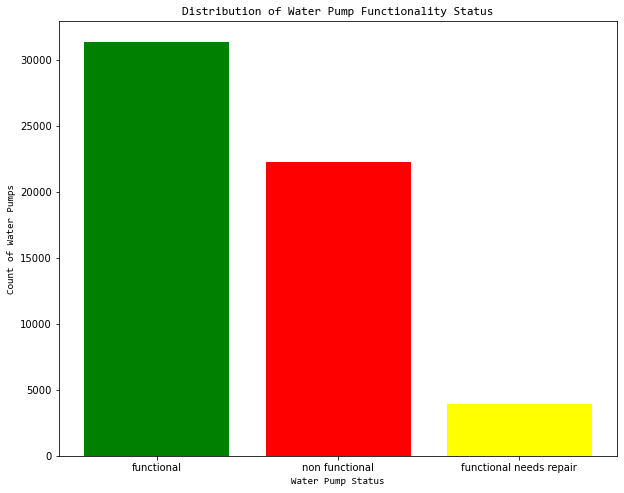

In [21]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Group the status_group column by counts
status_counts = merged_df['status_group'].value_counts()

# Assign colors to the three status groups
colors = {'functional': 'green', 'functional needs repair': 'yellow', 'non functional': 'red'}

# Create a histogram with color-coded bars
plt.bar(status_counts.index, status_counts, color=[colors.get(x.lower(), 'gray') for x in status_counts.index])

# Customize the plot
plt.xlabel('Water Pump Status', fontname='Consolas')
plt.ylabel('Count of Water Pumps', fontname='Consolas')
plt.title('Distribution of Water Pump Functionality Status', fontname='Consolas')

# Display the plot
plt.show()

Most of the water pumps are either functional or non functional as seen above.

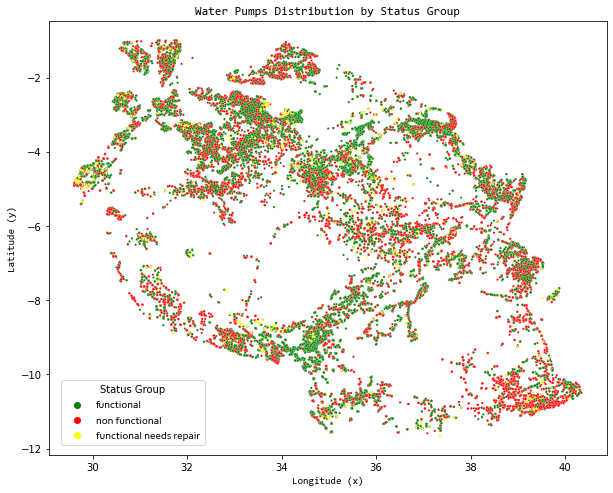

In [22]:
fig, ax = plt.subplots(figsize=(10,8))

# Here, we don't plot any Latitude(y) and Longitude(x) which has a value of 0
# Those draw (plot) at (0,0) which in geography is called Null island
location = merged_df.loc[(merged_df.longitude > 0) & (merged_df.latitude < 0)]

# Specify the color palette for the water pump status group
status_group_colors = {"functional": "green", "non functional": "red", "functional needs repair": "yellow"}

sns.scatterplot(data=location, x="longitude", y="latitude", hue="status_group", palette=status_group_colors, ax=ax, s=5)

# Set labels and title
ax.set_xlabel("Longitude (x)", fontname='Consolas')
ax.set_ylabel("Latitude (y)", fontname='Consolas')
ax.set_title("Water Pumps Distribution by Status Group", fontname='Consolas')

ax.legend(title="Status Group", bbox_to_anchor=(0.0125, 0.0125), loc="lower left", prop={"size": 11.0, "family": 'Corbel'})

plt.show()

For the majority of the country, the functionality status of the water pumps is evenly distributed. The South Eastern and western part of the country however, have slightly more non-functional pumps. There are also areas with no pumps at all. This might be areas with no inhabitants such as forests or game reserves.

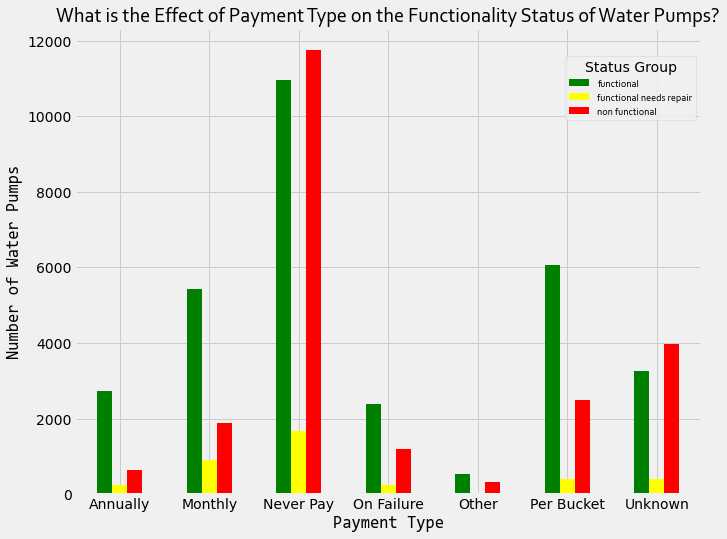

In [23]:
# Change the theme to a different style
plt.style.use('fivethirtyeight')

# Group the data by payment type and status group and count the number of pumps in each group
payment_df = merged_df.groupby(['payment_type', 'status_group']).size().unstack()

# Capitalize the values in the 'payment_type' column
payment_df.index = payment_df.index.str.title()

# Create the horizontal stacked bar graph
fig, ax = plt.subplots(figsize=(10,8))
payment_df.plot(kind='bar', stacked=False, ax=ax, color=['green', 'yellow', 'red'])

# Setting appropriate labels
ax.set_xlabel('Payment Type',fontname='Consolas')
ax.set_ylabel('Number of Water Pumps', fontname='Consolas')
ax.set_title('What is the Effect of Payment Type on the Functionality Status of Water Pumps?', fontname='Corbel')

# Show the legend
ax.legend(title="Status Group", bbox_to_anchor=(1.0, 0.95), loc="upper right", prop={"size": 10, "family": 'Corbel'})

# Ensure the x-axis labels are horizontal
plt.xticks(rotation=0)

# Display the graph
plt.show()

‘Never pay’ has the highest number of functional and non-functional water pumps. The non functional water pumps slightly outweigh the functional ones in ‘never pay ’ and ‘unknown’ payment type. Majority of the paid water pumps have more functional than non-functional water pumps.

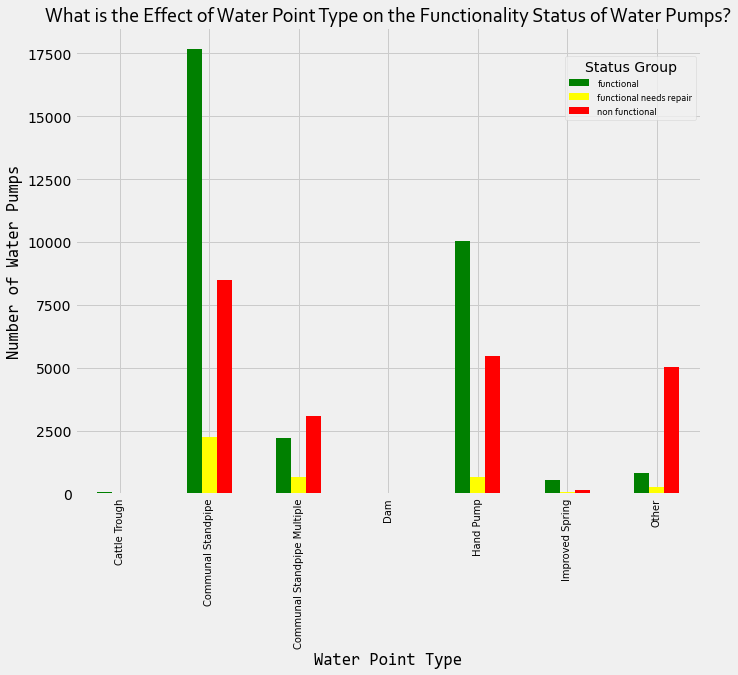

In [24]:
# Change the theme to a different style
plt.style.use('fivethirtyeight')

# Group the data by payment type and status group and count the number of pumps in each group
waterPType_df = merged_df.groupby(['waterpoint_type', 'status_group']).size().unstack()

# Capitalize the values in the 'payment_type' column
waterPType_df.index = waterPType_df.index.str.title()

# Create the horizontal stacked bar graph
fig, ax = plt.subplots(figsize=(10,8))
waterPType_df.plot(kind='bar', stacked=False, ax=ax, color=['green', 'yellow', 'red'])

# Setting appropriate labels
ax.set_xlabel('Water Point Type',fontname='Consolas')
ax.set_ylabel('Number of Water Pumps', fontname='Consolas')
ax.set_title('What is the Effect of Water Point Type on the Functionality Status of Water Pumps?', fontname='Corbel')

# Show the legend
ax.legend(title="Status Group", bbox_to_anchor=(1.0, 0.95), loc="upper right", prop={"size": 10, "family": 'Corbel'})

# Ensure the x-axis labels are horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)

# Display the graph
plt.show()

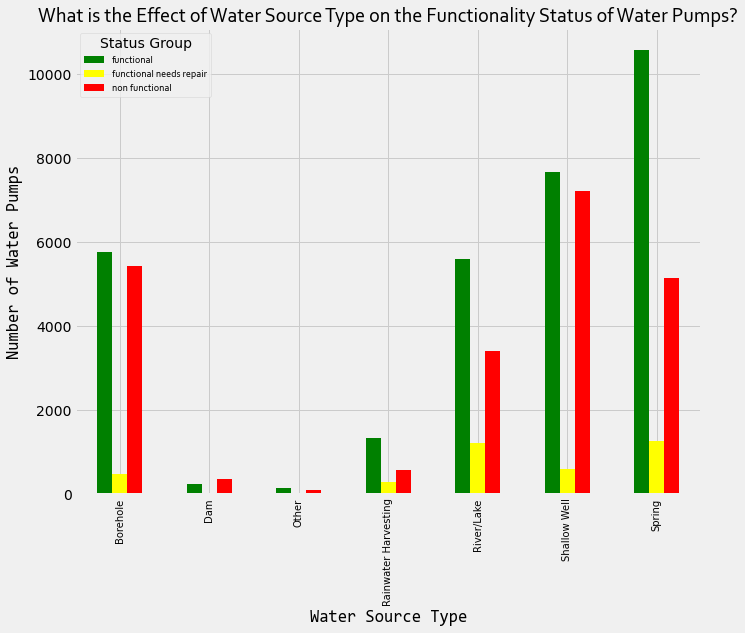

In [25]:
# Change the theme to a different style
plt.style.use('fivethirtyeight')

# Group the data by Source Type and status group and count the number of pumps in each group
SourceType_df = merged_df.groupby(['source_type', 'status_group']).size().unstack()

# Capitalize the values in the 'source_type' column
SourceType_df.index = SourceType_df.index.str.title()

# Create the horizontal stacked bar graph
fig, ax = plt.subplots(figsize=(10,8))
SourceType_df.plot(kind='bar', stacked=False, ax=ax, color=['green', 'yellow', 'red'])

# Setting appropriate labels
ax.set_xlabel('Water Source Type',fontname='Consolas')
ax.set_ylabel('Number of Water Pumps', fontname='Consolas')
ax.set_title('What is the Effect of Water Source Type on the Functionality Status of Water Pumps?', fontname='Corbel')

# Show the legend
ax.legend(title="Status Group", loc="upper left", prop={"size": 10, "family": 'Corbel'})

# Ensure the x-axis labels are horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)

# Display the graph
plt.show()

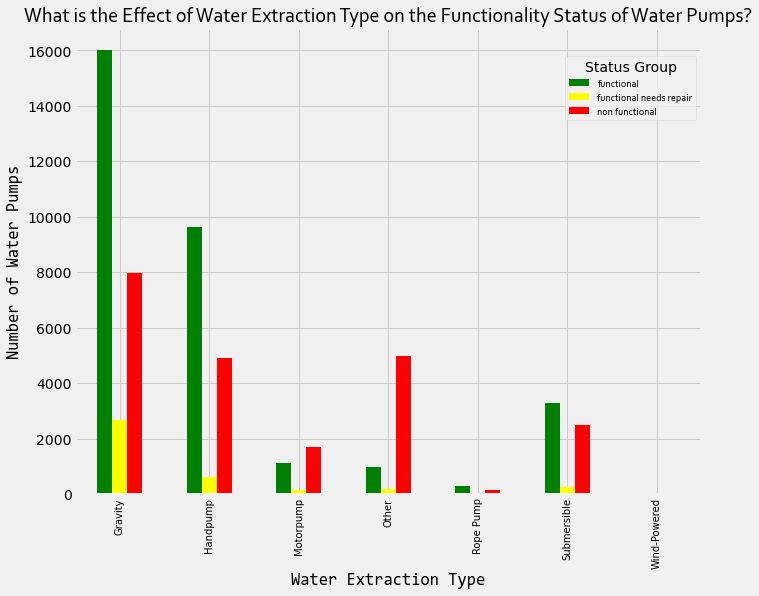

In [26]:
# Change the theme to a different style
plt.style.use('fivethirtyeight')

# Group the data by Water Extraction Type and status group and count the number of pumps in each group
ExtracType_df = merged_df.groupby(['extraction_type_class', 'status_group']).size().unstack()

# Capitalize the values in the 'extraction_type_class' column
ExtracType_df.index = ExtracType_df.index.str.title()

# Create the horizontal stacked bar graph
fig, ax = plt.subplots(figsize=(10,8))
ExtracType_df.plot(kind='bar', stacked=False, ax=ax, color=['green', 'yellow', 'red'])

# Setting appropriate labels
ax.set_xlabel('Water Extraction Type',fontname='Consolas')
ax.set_ylabel('Number of Water Pumps', fontname='Consolas')
ax.set_title('What is the Effect of Water Extraction Type on the Functionality Status of Water Pumps?', fontname='Corbel')

# Show the legend
ax.legend(title="Status Group", bbox_to_anchor=(1.0, 0.95), loc="upper right", prop={"size": 10, "family": 'Corbel'})

# Ensure the x-axis labels are horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)

# Display the graph
plt.show()

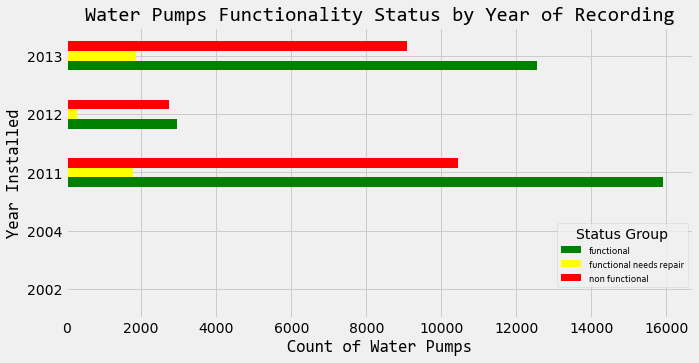

In [27]:
# Change the theme to a different style
plt.style.use('fivethirtyeight')

# Group the data by year and status group and count the number of pumps in each group
RecordYear_df = merged_df.groupby(['year', 'status_group']).size().unstack()

# Create the horizontal stacked bar graph
fig, ax = plt.subplots(figsize=(10,5))
RecordYear_df.plot(kind='barh', stacked=False, ax=ax, color=['green', 'yellow', 'red'])

# Set the labels and title
ax.set_xlabel('Count of Water Pumps', fontname='Consolas')
ax.set_ylabel('Year Installed', fontname='Consolas')
ax.set_title('Water Pumps Functionality Status by Year of Recording', fontname='Consolas')

# Show the legend
ax.legend(title="Status Group", bbox_to_anchor=(1.0, 0.09), loc="lower right", prop={"size": 10, "family": 'Corbel'})

# Display the graph
plt.show()

The Status of water pump functionality was recorded in different times of the year. Based on what we can see here, it appears that the recordings of 2011 had the highest number of water pumps that were functioning as well us those that were non-functional. The year 2012 had the lowest numbers of the three different years that were mapped.

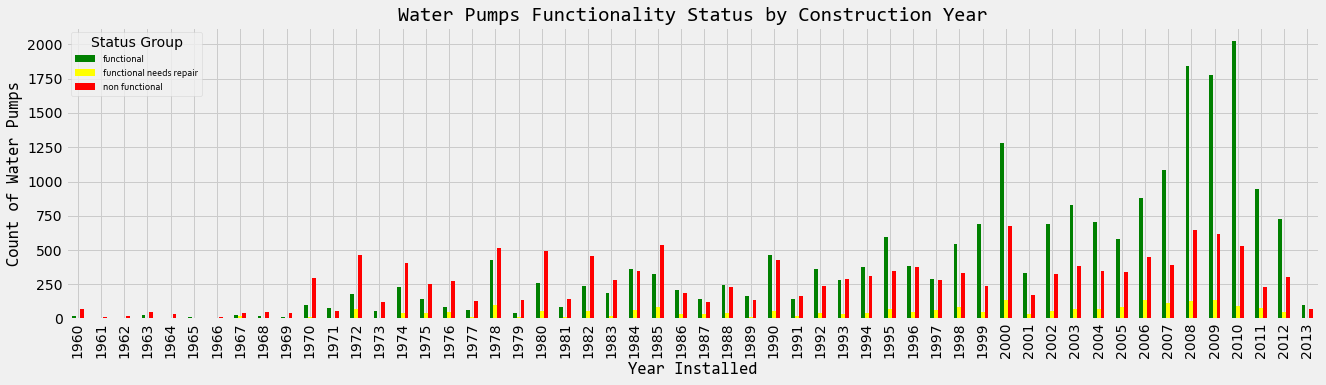

In [28]:
# Change the theme to a different style
plt.style.use('fivethirtyeight')

# Group the data by year and status group and count the number of pumps in each group
filtered_df = merged_df[merged_df['construction_year'] != 0]  # Filter out rows where construction_year is 0
InstallYear_df = filtered_df.groupby(['construction_year', 'status_group']).size().unstack()

# Rest of the code remains the same...

# Create the horizontal stacked bar graph
fig, ax = plt.subplots(figsize=(20,5))
InstallYear_df.plot(kind='bar', stacked=False, ax=ax, color=['green', 'yellow', 'red'])

# Set the labels and title
ax.set_xlabel('Year Installed', fontname='Consolas')
ax.set_ylabel('Count of Water Pumps', fontname='Consolas')
ax.set_title('Water Pumps Functionality Status by Construction Year', fontname='Consolas')

# Show the legend
ax.legend(title="Status Group", loc="upper left", prop={"size": 10, "family": 'Corbel'})

# Display the graph
plt.show()

The data has an issue since there are so many records that did not have their year of construction recorded. This is the reason why we have many of the values appearing as 0. Neverthless, the number of water pumps that were constructed or installed in the earlier years (mostly earlier than 2000) had the number of non-functional pumps being higher than the other two categories of status grouping. From 2000 - 2013 installments, the functional pumps were more than the other status groups.

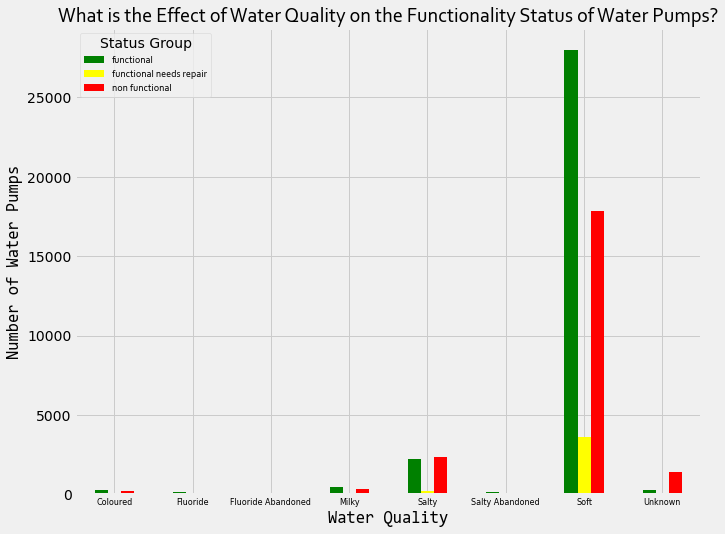

In [29]:
# Change the theme to a different style
plt.style.use('fivethirtyeight')

# Group the data by payment type and status group and count the number of pumps in each group
waterQuality_df = merged_df.groupby(['water_quality', 'status_group']).size().unstack()

# Capitalize the values in the 'payment_type' column
waterQuality_df.index = waterQuality_df.index.str.title()

# Create the horizontal stacked bar graph
fig, ax = plt.subplots(figsize=(10,8))
waterQuality_df.plot(kind='bar', stacked=False, ax=ax, color=['green', 'yellow', 'red'])

# Setting appropriate labels
ax.set_xlabel('Water Quality',fontname='Consolas')
ax.set_ylabel('Number of Water Pumps', fontname='Consolas')
ax.set_title('What is the Effect of Water Quality on the Functionality Status of Water Pumps?', fontname='Corbel')

# Show the legend
ax.legend(title="Status Group", loc="upper left", prop={"size": 10, "family": 'Corbel'})

# Ensure the x-axis labels are horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=8)


# Display the graph
plt.show()

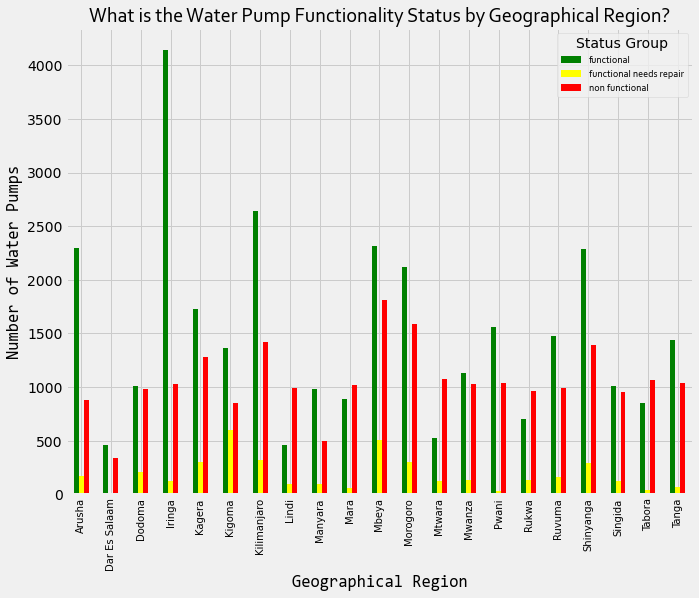

In [30]:
# Change the theme to a different style
plt.style.use('fivethirtyeight')

# Group the data by region and status group and count the number of pumps in each group
geoRegion_df = merged_df.groupby(['region', 'status_group']).size().unstack()

# Capitalize the values in the 'region' column
geoRegion_df.index = geoRegion_df.index.str.title()

# Create the horizontal stacked bar graph
fig, ax = plt.subplots(figsize=(10,8))
geoRegion_df.plot(kind='bar', stacked=False, ax=ax, color=['green', 'yellow', 'red'])

# Setting appropriate labels
ax.set_xlabel('Geographical Region',fontname='Consolas')
ax.set_ylabel('Number of Water Pumps', fontname='Consolas')
ax.set_title('What is the Water Pump Functionality Status by Geographical Region?', fontname='Corbel')

# Show the legend
ax.legend(title="Status Group", loc="upper right", prop={"size": 10, "family": 'Corbel'})

# Ensure the x-axis labels are horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=10)


# Display the graph
plt.show()

From the illustration above, it appears that most water pump have soft - good for human consumption. This category has the most functional water pumps than the non-functional ones even though the number of non-functional ones is still high.

The dataset supplied contains 59,400 records and 40 features (where 30 are categorical, 8 being numerical and the remaining 2 are date features). The data was separated into three datasets: training values, test values, and training labels. The training and test values datasets both had 40 predictors, while the training labels dataset had one target variable, “status_group” which had three values as shown below.

## **DATA PROCESSING**

We are going to visualize the effect that different predictors have on the target variable. To do so, we are going to merge the training values and training labels data frames to form a singular data frame called ``merged_df``.

- Handling null values
- Data cleaning
- Feature Engineering i.e (creating new columns if need be )
- Feature Selection (select only a number of columns)
- Scaling if required - we shall be guided by the requirements of the model


In [31]:
from functions import unnecessaryCols

drop_cols = ['wpt_name', 'num_private', 'subvillage', 'region', 'lga', 
             'ward', 'recorded_by', 'scheme_name', 'scheme_management', 
             'extraction_type', 'extraction_type_group', 'management_group', 
             'payment', 'quality_group', 'quantity', 'source', 'waterpoint_type'
             ] 

train_values = unnecessaryCols(train_values, drop_cols)

In [32]:
# Show the new columns
train_values.tail(2)

id  amount_tsh date_recorded      funder  gps_height installer  \
59398  31282         0.0      3/8/2011       Malec           0      Musa   
59399  26348         0.0     3/23/2011  World Bank         191     World   

       longitude  latitude        basin  region_code  ...  permit  \
59398  35.861315 -6.378573       Rufiji            1  ...    True   
59399  38.104048 -6.747464  Wami / Ruvu            5  ...    True   

       construction_year extraction_type_class management  payment_type  \
59398                  0              handpump        vwc     never pay   
59399               2002              handpump        vwc    on failure   

      water_quality quantity_group   source_type source_class  \
59398          soft   insufficient  shallow well  groundwater   
59399         salty         enough  shallow well  groundwater   

      waterpoint_type_group  
59398             hand pump  
59399             hand pump  

[2 rows x 23 columns]

In [33]:
train_values.describe()

id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        region_code  district_code    population  construction_year  
count  59400.000000   59400.000000  59400.000000       59400.000000  
mean      15.297003       5.629747    179.909983        1300.652475  
std       17.587406       9.633649    471.482176         951.620547  
min        1.000000       0.000000      0.000000           0.000000  
25%        5.000000       2.000000      0.000000           0.000000  
50%       12.000000       3.000000     25.000000        1986.000000  
75%       17.000000       5.000000    215.000000        2004.000000  
max       99.000000      80.000000  30500.000000        2013.000000

### **Explanation**

<ul type='circle'> 
    <li>The Training Values Data has a total of <strong>59,400</strong> rows.</li>
    <li>From the summary statistics shown above, the water pumps serving the highest population around a well (water point) is <strong>35,000</strong> and an average of about <strong>180</strong> people.</li>
    <li>There is quite a huge number of water pumps with an installation year recorded as <strong>0</strong> which would mean that by the time the data was being recorded, there were no information about those specific water pumps construction year. The last water pump to be installed was in <strong>2013</strong>.</li>
</ul>

In [34]:
"""
The function called checks for the cardniality.
A function defined as assessHighCardinality takes a DataFrame as input. 
It then identifies the categorical columns (categorical_cols) in the DF by checking their data type ('O' for object).
Then, the high cardinality categorical columns are identified as (hCardinality_cols).
This is achieved by counting the unique values for each column and selecting those with >1000 unique values.
Finally, the code returns the list of high cardinality columns.
"""
from functions import assessHighCardinality

hCardinality_cols = assessHighCardinality(train_values)
hCardinality_cols

['funder', 'installer']

In [35]:
"""
This function: assessPlaceholders, takes the dataframe as a parameter.
A loop that iterates over each column of the df is initialized inside the function.
For each column, the loop prints the value counts of the column in normalized form.
This will show the count of each unique value in the column.
"""
from functions import assessPlaceholders

assessPlaceholders(train_values[hCardinality_cols])

┌──────┬────────────────────────────────┬─────────────┐
│      │ Value                          │       Count │
├──────┼────────────────────────────────┼─────────────┤
│    0 │ Government Of Tanzania         │ 0.162898    │
│    1 │ Danida                         │ 0.0558415   │
│    2 │ Hesawa                         │ 0.0394871   │
│    3 │ Rwssp                          │ 0.0246391   │
│    4 │ World Bank                     │ 0.0241908   │
│    5 │ Kkkt                           │ 0.023079    │
│    6 │ World Vision                   │ 0.0223438   │
│    7 │ Unicef                         │ 0.0189545   │
│    8 │ Tasaf                          │ 0.0157267   │
│    9 │ District Council               │ 0.015117    │
│   10 │ Dhv                            │ 0.014866    │
│   11 │ Private Individual             │ 0.0148122   │
│   12 │ Dwsp                           │ 0.0145432   │
│   13 │ 0                              │ 0.0139335   │
│   14 │ Norad                          │ 0.0137

<ul>
   <li>Columns  funder and installer both have over 1800 values that will be an issue when One hot Encoding is performed. The values in this two columns will be reduced in 5 values that is, the top 4 largest funders/installer and the rest of the values will be marked as 'other'</li>
 </ul>

In [36]:
from functions import downscaleCardinality

train_values = downscaleCardinality(train_values)

In [37]:
# Check if there are any remaining values: there are supposed to be none.
assessHighCardinality(train_values)

[]

 ### Handling the Missing Values

We shall approach this task by creating a function that shall be call 'valsMissing' and then pass in our data frame as data.

In [38]:
from functions import valsMissing

valsMissing(train_values)

{'public_meeting': 3334, 'permit': 3056}

In [39]:
train_values['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [40]:
from functions import fill_missing_with_random
from modules import * # This function utilizes the random module which is called from the modules.py file

train_values = fill_missing_with_random(train_values)

In [41]:
# Confirm whether indeed the function above worked as expected
# It should be an empty output meaning that the non-missing values are no-longer present
valsMissing(train_values)

{}

### *Conversion of DTypes*

As would be expected for a Classification Model, most of the DTypes for our columns are looking good. However, there are some exceptions for columns dealing with time such as the ``date_rcorded`` & ``construction_year`` and others like the ``permit``.

Previously, we had joined the training values and training labels dataframes so that we could achieve on visualizations created in acouple of cells above. The year and month had been created as new columns.

In this case, we shall use the time columns (``date_rcorded`` & ``construction_year``) to create a column: ``Age``. For this reason, we won't change the dtype of the two columns for now.

In [42]:
# Revisit the data types of our train_values df
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 59400 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              59400 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   basin                  59400 non-null  object 
 9   region_code            59400 non-null  int64  
 10  district_code          59400 non-null  int64  
 11  population             59400 non-null  int64  
 12  public_meeting         59400 non-null  bool   
 13  permit                 59400 non-null  bool   
 14  construction_year      59400 non-null  int64  
 15  ex

In [43]:
"""
This part calculates the frequency counts of unique values in the 'construction_year' 
column of the 'train_values' data frame and returns the result in normalized form.
The output is a series where the index represents the unique 'construction_year' values, 
and the values represent the normalized frequency (%) of each unique value in the column.
"""
train_values['construction_year'].value_counts(normalize=True)

0       0.348636
2010    0.044529
2008    0.043990
2009    0.042643
2000    0.035202
2007    0.026717
2006    0.024764
2003    0.021650
2011    0.021145
2004    0.018906
2012    0.018249
2002    0.018098
1978    0.017458
1995    0.017071
2005    0.017020
1999    0.016481
1998    0.016263
1990    0.016061
1985    0.015909
1980    0.013653
1996    0.013653
1984    0.013114
1982    0.012525
1994    0.012424
1972    0.011919
1974    0.011380
1997    0.010842
1992    0.010774
1993    0.010236
2001    0.009091
1988    0.008771
1983    0.008215
1975    0.007357
1986    0.007306
1976    0.006970
1970    0.006919
1991    0.005455
1989    0.005320
1987    0.005084
1981    0.004007
1977    0.003401
1979    0.003232
1973    0.003098
2013    0.002963
1971    0.002441
1960    0.001717
1967    0.001481
1963    0.001431
1968    0.001296
1969    0.000993
1964    0.000673
1962    0.000505
1961    0.000354
1965    0.000320
1966    0.000286
Name: construction_year, dtype: float64

From the above normalization, we can see that about 35% of the Construction Year of the Water Pumps have a 0 as the entry record. This is a huge number compared to the other %s for the various years.

Removing the rows with 0s would affect our model and for this reason, we are going to leave those in. Another thing would be dropping the whole column but for now, we shall leave it as it is fro we may end up using it. We shall come back to this at a later time.

In [44]:
from sklearn.preprocessing import OrdinalEncoder

# Create an instance of Binary ordinalEncoder
bEncoder = OrdinalEncoder()

# Encode 'public_meeting' & 'permit' columns
permit_encoded = bEncoder.fit_transform(train_values[['permit']])
public_meeting_encoded = bEncoder.fit_transform(train_values[['public_meeting']])

# Flatten the encoded arrays
permit_encoded = permit_encoded.flatten()
public_meeting_encoded = public_meeting_encoded.flatten()

# Update 'public_meeting' and 'permit' columns in the train_values dataframe
train_values['public_meeting'] = public_meeting_encoded
train_values['permit'] = permit_encoded

In [45]:
train_values.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
basin                     object
region_code                int64
district_code              int64
population                 int64
public_meeting           float64
permit                   float64
construction_year          int64
extraction_type_class     object
management                object
payment_type              object
water_quality             object
quantity_group            object
source_type               object
source_class              object
waterpoint_type_group     object
dtype: object

 #### *Handling the Duplicates*

Normally, we'd expect that every water point (or pump) is uniquely identifiable using an assigned ID, therefore - if we have any ID appearing more than once for water points, that would indicate that it's a duplicate. 

In the cell(s) below, we are going to explore the ``id`` column for duplicates. If there are any, we shall drop them.

In [46]:
# For this line to work, ensure that you are not using index_col=0 initially

# Calculate the number of duplicate values in the 'id' column
id_col_duplicates = train_values['id'].duplicated(keep=False).sum()

if id_col_duplicates > 0:
    print(f"There are {id_col_duplicates} duplicate values in the 'id' column.\n"
          "Please examine those duplicates and handle them as needed.")
else:
    print("There are no duplicate values in the 'id' column.\n"
          "We are good to proceed with that column as it is.")

There are no duplicate values in the 'id' column.
We are good to proceed with that column as it is.


 #### *Handling the Outliers (if any) and Column Placeholders*

 We shall be performing a number of operations such as identifying the outliers, handling them, deal with column placeholders, and this will help us to evaluate the impact, overall in our model.

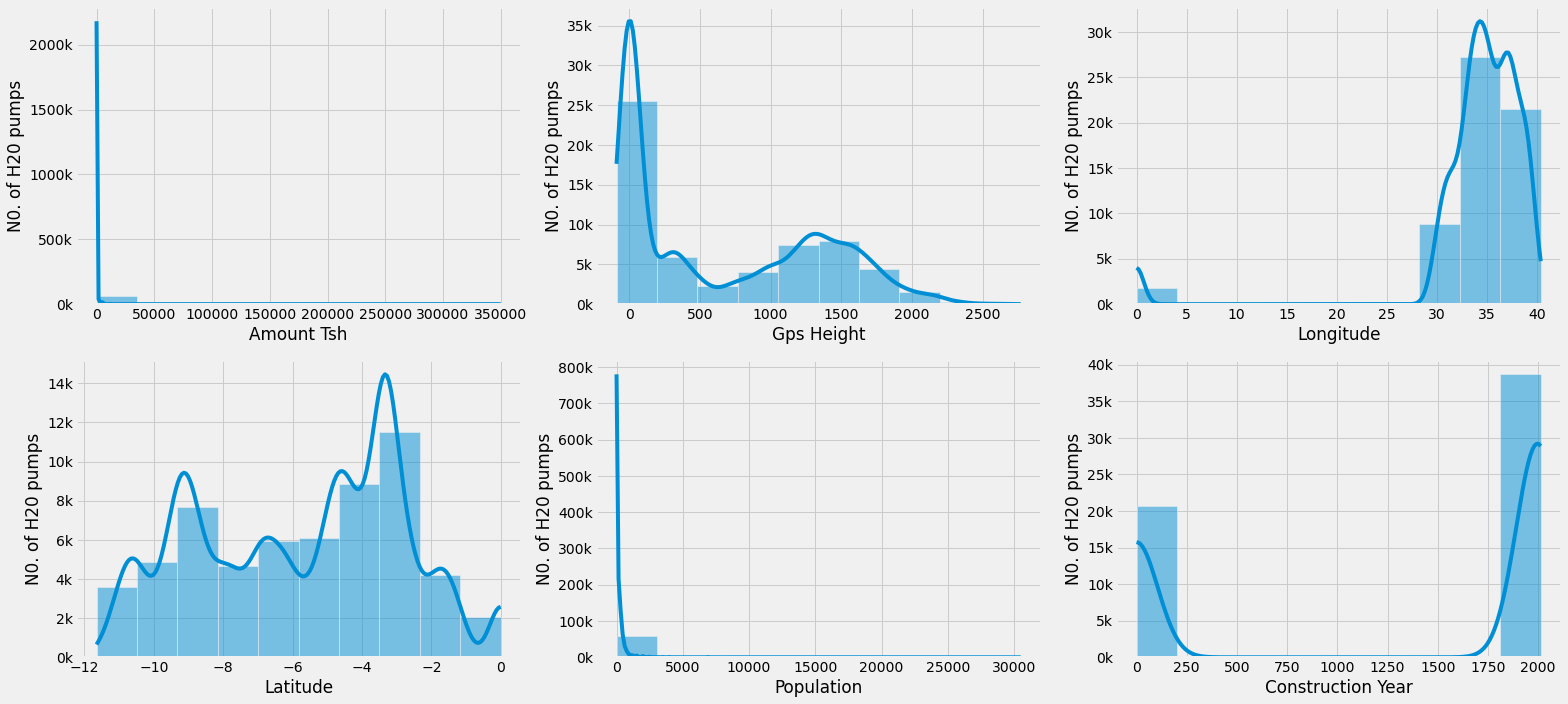

In [47]:
from functions import vizOutliers

vizOutliers(train_values)

Next, let us assess the outliers. We shall call in our function ``assessPlaceholders``.

In [48]:
assessPlaceholders(train_values.drop('id', axis=1))

┌────┬───────────┬─────────────┐
│    │     Value │       Count │
├────┼───────────┼─────────────┤
│  0 │      0    │ 0.700993    │
│  1 │    500    │ 0.0522222   │
│  2 │     50    │ 0.0416162   │
│  3 │   1000    │ 0.0250505   │
│  4 │     20    │ 0.0246296   │
│  5 │    200    │ 0.0205387   │
│  6 │    100    │ 0.0137374   │
│  7 │     10    │ 0.013569    │
│  8 │     30    │ 0.0125084   │
│  9 │   2000    │ 0.0118519   │
│ 10 │    250    │ 0.00957912  │
│ 11 │    300    │ 0.0093771   │
│ 12 │   5000    │ 0.00757576  │
│ 13 │      5    │ 0.00632997  │
│ 14 │     25    │ 0.00599327  │
│ 15 │   3000    │ 0.0056229   │
│ 16 │   1200    │ 0.00449495  │
│ 17 │   1500    │ 0.0033165   │
│ 18 │      6    │ 0.00319865  │
│ 19 │    600    │ 0.00296296  │
│ 20 │   4000    │ 0.00262626  │
│ 21 │   2400    │ 0.00244108  │
│ 22 │   2500    │ 0.00234007  │
│ 23 │   6000    │ 0.00210438  │
│ 24 │      7    │ 0.00116162  │
│ 25 │   8000    │ 0.00102694  │
│ 26 │    750    │ 0.000993266 │
│ 27 │    

#### **Explanation**:


| Data Column                                           | Description        |
| --------------------------------------------------------- | -------------- |
| ``amount_tsh`` |*About 70% of the entries have been recorded as 0, a potential value if the values were missing. For our classification model, this would introduce an issue. We might not utilize this column in our model. Options to deal with the zeros include: replacing them with the column's median value.* |
| ``gps_height`` | *About 34% of the values is 0. To deal with this, we can replace the 0 values with the median of the column.* |
| ``longitude & latitude`` | *As captured in our previous sections, there are longitude and latitude rows that appear to have values of 0. This will be dropped since we saw them to be around 1,800 water points that were captured with a wrong spatial property. If dropping those points will lead to a poor model, we shall revisit and keep them for an improved model.* |
| ``population`` | *This has about 35% of the values entered as 0 with 11% recorded with a value of 1. This comes to a total of about 47% being captured as either 0/1. We can therefore, convincingly argue why this column cannot be used in our classification model since it will not be of much use.* |
| ``construction_year`` | *With about 34% of the values being captured as 0, we will replace those with the median value of this column.* |
| ``management`` | *This column has both the **other** & **unknown** which might potentially mean the same thing. To deal with this, we shall assign it to one value of the two. For the **other - school**, we shall just have that as 'school' and have that issue resolved.* |
| ``payment_type`` | *In this column, **other** & **unknown** values will be transformed to only be captured as 'other'* | 
 

In [49]:
null_values_mapping = {'amount_tsh': 0, 'gps_height': 0, 
                       'longitude': 0, 'latitude':-2.000000e-08,
                       'population': 0, 'construction_year': 0
                       }
 # To revisit this if the model doesn't perform. We shall not drop  the 0s for long/lat
    # 'longitude': 0,
    # 'latitude': 0,

for record, null in null_values_mapping.items():
    train_values[record]=train_values[record].replace(null, np.nan)

col_placeholders = valsMissing(train_values)

In [50]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object with median as the strategy
imputer = SimpleImputer(strategy='median')

# Replace missing values in specified columns
placeholder_replaced = imputer.fit_transform(train_values[col_placeholders])

# Create a new DataFrame from the replaced values
placeholder_replaced = pd.DataFrame(placeholder_replaced, columns=train_values[col_placeholders].columns, index=train_values.index)

# Remove columns from train_values DataFrame
train_values = train_values.drop(train_values[col_placeholders].columns, axis=1)

# Concatenate train_values with placeholder_replaced DataFrame
train_values = pd.concat([train_values, placeholder_replaced], axis=1)

In [51]:
# Display the last 5 rows of the updated train_values DataFrame
train_values.tail()

id date_recorded funder installer        basin  region_code  \
59395  60739      5/3/2013  other     other      Pangani            3   
59396  27263      5/7/2011  other     other       Rufiji           11   
59397  37057     4/11/2011  other     other       Rufiji           12   
59398  31282      3/8/2011  other     other       Rufiji            1   
59399  26348     3/23/2011  other     other  Wami / Ruvu            5   

       district_code  public_meeting  permit extraction_type_class  ...  \
59395              5             1.0     1.0               gravity  ...   
59396              4             1.0     1.0               gravity  ...   
59397              7             1.0     0.0              handpump  ...   
59398              4             1.0     1.0              handpump  ...   
59399              2             1.0     1.0              handpump  ...   

      quantity_group   source_type source_class waterpoint_type_group  \
59395         enough        spring  groundwater    communal standpipe   
59396         enough    river/lake      surface    communal standpipe   
59397         enough      borehole  groundwater             hand pump   
59398   insufficient  shallow well  groundwater             hand pump   
59399         enough  shallow well  groundwater             hand pump   

      amount_tsh gps_height  longitude  latitude  population  \
59395       10.0     1210.0  37.169807 -3.253847       125.0   
59396     4700.0     1212.0  35.249991 -9.070629        56.0   
59397      250.0     1167.0  34.017087 -8.750434       150.0   
59398      250.0     1167.0  35.861315 -6.378573       150.0   
59399      250.0      191.0  38.104048 -6.747464       150.0   

       construction_year  
59395             1999.0  
59396             1996.0  
59397             2000.0  
59398             2000.0  
59399             2002.0  

[5 rows x 23 columns]

#### Displaying the Changes in Outliers

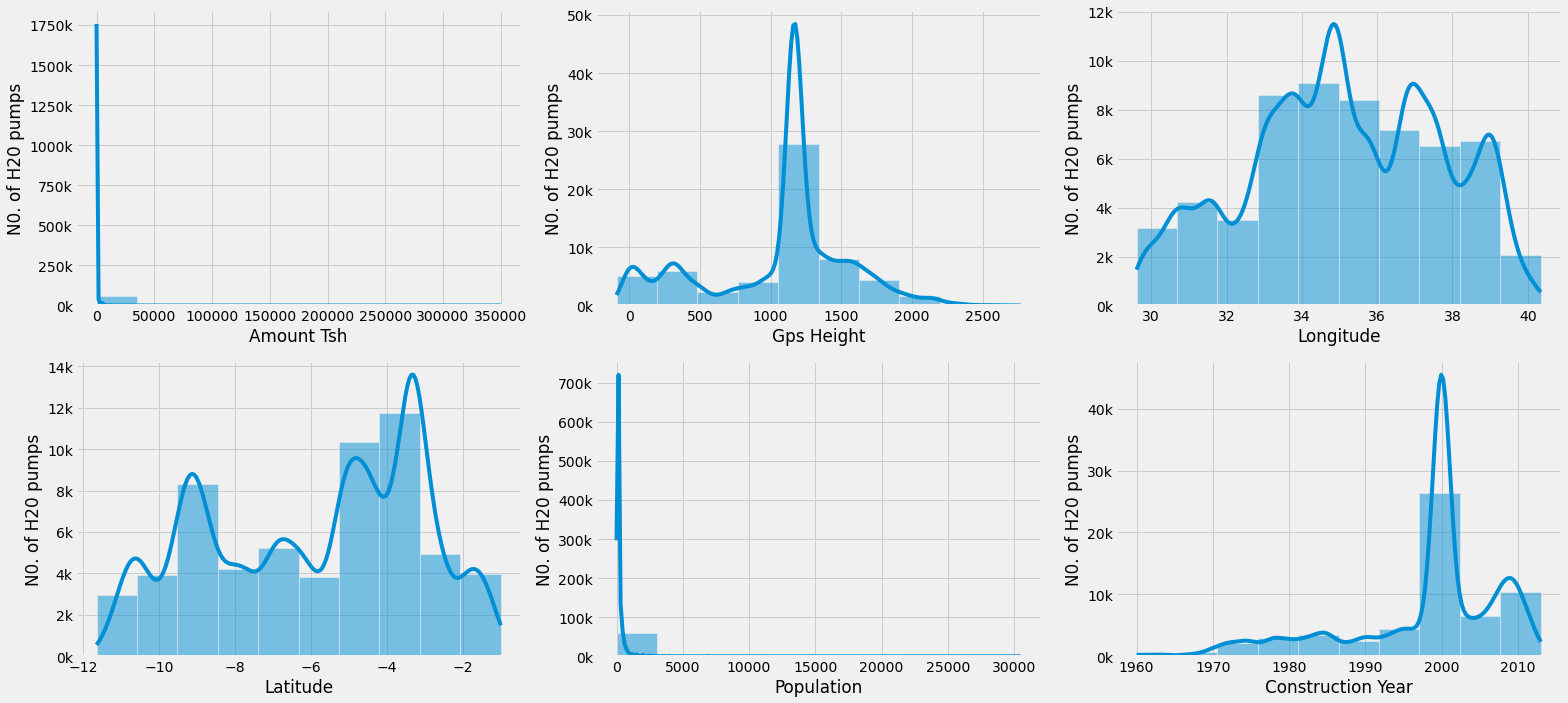

In [52]:
vizOutliers(train_values)

**Revising columns by replacing similar values with a shared value**

Previously, we had indicated that some of the columns have values such as 'other' & 'unknown' captured and such are the changes we want to effect here and have those placeholders changed to 'other' just as an example.

In [53]:
from functions import valReplacer

train_values = valReplacer(train_values)

#### **Checking for and Removing Multicolinearity**

Multicollinearity occurs when predictor variables in a regression model are highly correlated with each other. It can lead to unstable coefficients, inflated standard errors, and difficulties in interpreting model results. 

To check for and address multicollinearity, we shall ``Calculate correlation matrix``: This involves computing the correlation matrix of the _predictor variables_. The output matrix shows the pairwise correlations between all variables in the dataset. 

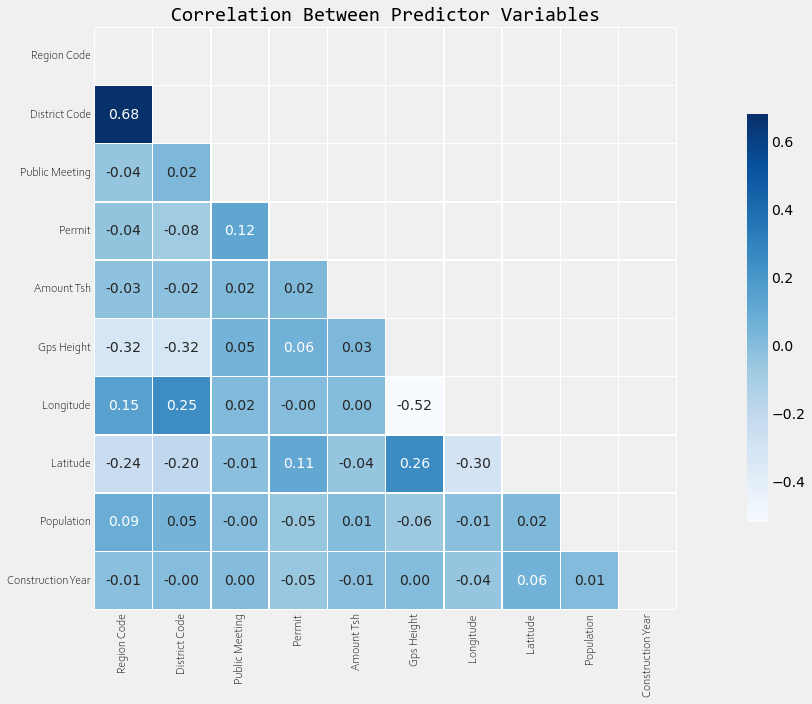

In [54]:
# Calculate the correlation matrix
correlation_matrix = train_values.drop('id', axis=1).corr()

# Modify the column labels
column_labels = [label.replace("_", " ").title() for label in correlation_matrix.columns]

# Create a heatmap plot
plt.figure(figsize=(20, 10))
sns.heatmap(
    correlation_matrix,
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)),
    cmap=sns.color_palette("Blues", as_cmap=True),
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='white',  # Add this line to set the color of the lines between the squares
    square=True,
    cbar=True,
    cbar_kws={"shrink": 0.7, "orientation": "vertical", "pad": 0.05},
    xticklabels=column_labels,  # Use the modified column labels for x-axis tick labels
    yticklabels=column_labels  # Use the modified column labels for y-axis tick labels
)
plt.title('Correlation Between Predictor Variables', fontname='Consolas', fontweight='regular', fontsize=20)
plt.xticks(rotation=90, ha='center', fontname='Corbel', fontweight='light', fontsize=12)
plt.yticks(rotation=0, va='center', fontname='Corbel', fontweight='light', fontsize=12)
plt.tight_layout()
plt.show()

#### *Explanation:*

As proved by the correlation matrix above, we don't have high multicollinearity between attributes of our Tanzania Water Pumps Dataset.

In case we had a high multicolinearity, from sklearn.linear_model import Ridge, we'd have utilized ``Ridge Regression``: It handles multicoliniality well by distributing the weight among correlated features.


## **FEATURE ENGINEERING**

Feature engineering is the process of creating new features or transforming existing ones to improve the performance of a machine learning model. It involves leveraging domain knowledge, data understanding, and creativity to extract meaningful information from the available data. Feature Engineering will help us transform some of the raw data into meaningful features so that we can improve our analyis.

In our case, it shall involve: _Feature Transformation_, _Interaction and Polynomial Features_, _Encoding Categorical Variables_, and _Feature Selection_.

In [55]:
# TO HANDLE THE 2013-02-04 IGNORE error which pops up somewhere in the test values preparation
from functions import age

train_values = age(train_values)

#### *Splitting the Training Values and Training Labels*

The splitting of the training values and training labels will be done so that we can have the training and test data.

In [56]:
# Splitting train_values and train_labels
# into train and test data

# Printing value counts of 'status_group' column
value_counts = train_labels['status_group'].value_counts()
normalized_value_counts = train_labels['status_group'].value_counts(normalize=True)

# Printing the value counts
print(f"Status Group Counts:\n{value_counts}\n")

# Printing the normalized value counts
print(f"Normalized Value Counts:\n{normalized_value_counts}")

Status Group Counts:
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

Normalized Value Counts:
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


There is a potential class of imbalance as seen above. There are various effects of **Class Imbalance** in a model that we need to avoid as much as possible. These include:

<ol type='1'> 
    <li><strong>Biased Predictions:</strong> Training an imbalanced data may lead to the model being biased towards the majority class since it has more examples to learn from. The result of this is that it can potentially lead to the model struggling to correctly predict instances from the minority class.</li>
    <li><strong>Poor Generalization:</strong> Traditional evaluation metrics like accuracy can be misleading when dealing with class imbalance. For example, a model that always predicts the majority class can achieve high accuracy if the majority class is dominant. Therefore, metrics like precision, recall, and F1-score are often used to better understand the model's performance on each class.</li>
    <li><strong>Evaluation Metrics:</strong> Traditional evaluation metrics like accuracy can be misleading when dealing with class imbalance. For example, a model that always predicts the majority class can achieve high accuracy if the majority class is dominant. Therefore, metrics like precision, recall, and F1-score are often used to better understand the model's performance on each class.</li>
</ol>

Due to the effects detailed above, it is therefore advisable to mitigate the impacts of Class Imbalance. The following techniques can be applied to do so:

<ol type='1'>
   <li><strong>Resampling:</strong> The technique entails oversampling the class with minority values to increase its representation or under-sampling the majority class to reduce its domination. SMOTE (Synthetic Minority Over-Sampling Technique), Random Oversampling, and Edited Nearest Neighbors methods can be used.</li>
   <li><strong>Class Weighting:</strong> This involves assigning higher weights to the minority class when training thus making the model pay more attention to the weights. As a result, this corrects the imbalance.</li>
   <li><strong>Ensemble Methods:</strong> To improve the overall performance on imbalanced data, techniques such as bagging or boosting algorithms can be applied to combine multiple learners, each trained on a different subset or with different weights.</li>
   <li><strong>Anomaly Detection:</strong> If the minority class represents anomalies or rare events, anomaly detection techniques can be employed to identify and handle such instances separately.</li>
</ol>

In [57]:
# drop the 'id' column from the train_labels dataset using the drop() function with axis=1
# Extract only the 'status_group' column using indexing.
train_labels = train_labels.drop('id', axis=1)['status_group']
print(train_labels)

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object


In [58]:
"""
These columns will be the id, data_recorded, construction_year, and year recorded
"""
discardCols = ['id', 
               'date_recorded', 
               'construction_year', 
               'year recorded'
               ]
train_values.drop(columns=discardCols, inplace=True)

In [59]:
train_values.head(2)

funder installer          basin  region_code  district_code  public_meeting  \
0  other     other     Lake Nyasa           11              5             1.0   
1  other     other  Lake Victoria           20              2             0.0   

   permit extraction_type_class management  \
0     0.0               gravity        vwc   
1     1.0               gravity        wug   

                                payment_type water_quality quantity_group  \
0  pay(annual/per_bucket/on_failure/monthly)          soft         enough   
1                                  never pay          soft   insufficient   

            source_type source_class waterpoint_type_group  amount_tsh  \
0                spring  groundwater    communal standpipe      6000.0   
1  rainwater harvesting      surface    communal standpipe       250.0   

   gps_height  longitude  latitude  population  
0      1390.0  34.938093 -9.856322       109.0  
1      1399.0  34.698766 -2.147466       280.0

In [60]:
from sklearn.model_selection import train_test_split
"""
X_train: Training data for the input features.
X_test: Testing data for the input features.
y_train: Training data for the target labels.
y_test:Testing data for the target labels.

We call the train_test_split() function is called with the following parameters: 

train_values: Dataset containing the input features to be split.
train_labels: Dataset containing the target labels to be split.
test_size=0.2: Specifies that 20% of the data should be allocated for testing, 
while the remaining 80% will be used for training.
random_state=96: Sets the random seed to ensure reproducibility of the train-test split. 
The same seed will result in the same output, allowing for consistent experimentation and evaluation.
"""

X_train, X_test, y_train, y_test = train_test_split(train_values, train_labels, test_size=0.2, random_state=96)
X_train.tail(2)

funder installer       basin  region_code  district_code  \
29658  Danida       DWE  Lake Nyasa           10              2   
47188   other     other     Pangani            4              6   

       public_meeting  permit extraction_type_class management  \
29658             1.0     1.0              handpump        vwc   
47188             1.0     1.0           submersible        vwc   

                                    payment_type water_quality quantity_group  \
29658  pay(annual/per_bucket/on_failure/monthly)          soft            dry   
47188                                  never pay          soft   insufficient   

        source_type source_class waterpoint_type_group  amount_tsh  \
29658  shallow well  groundwater             hand pump      2500.0   
47188    river/lake      surface    communal standpipe       250.0   

       gps_height  longitude   latitude  population  
29658      1051.0  35.666161 -10.405232       600.0  
47188       336.0  38.528673  -5.609289        50.0

 #### **One Hot Encoding on categorical data**

 One Hot Encoding is a technique used to represent categorical variables as binary vectors. Its purpose is to convert categorical variables into a numerical format that can be easily understood by machine learning algorithms. There are various libraries in different programming languages that offer One Hot Encoding functions and in our case, we shall be using _OneHotEncoder_ in scikit-learn (Python).

In [61]:
"""
This code applies one-hot encoding to the listed categorical columns of the dataset.
The other columns are left unchanged.
"""
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# One hot encoding on categorical data
one_hot_encoding = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False),
    ['funder', 'installer','basin', 'extraction_type_class', 'management',
    'payment_type', 'water_quality', 'quantity_group','source_type','source_class',
    'waterpoint_type_group'])
], remainder='passthrough')

In [62]:
# Define a pipeline for one-hot encoding using the previously created one_hot_encoding transformer.
from sklearn.pipeline import Pipeline

ohe_pipe = Pipeline([('one_hot_encoding', one_hot_encoding)])

# sparse=False is set to ensure that the encoded output is not a sparse matrix
# ohe_pipe = Pipeline([('one_hot_encoding', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# We will use this one-hot encoding pipeline, you would typically call the fit_transform() method 
# on our dataset - pass it as the argument to perform the one-hot encoding transformation on the provided categorical columns

In [63]:
#Fit_transform on X_train
X_train_encoded = ohe_pipe.fit_transform(X_train)
X_train_encoded

array([[  0.        ,   0.        ,   0.        , ...,  33.76367761,
         -9.56757138, 150.        ],
       [  0.        ,   0.        ,   0.        , ...,  34.37745076,
         -5.76677932, 150.        ],
       [  0.        ,   0.        ,   0.        , ...,  33.06964726,
         -3.22741987, 150.        ],
       ...,
       [  0.        ,   1.        ,   0.        , ...,  37.1855546 ,
         -4.46030112, 200.        ],
       [  1.        ,   0.        ,   0.        , ...,  35.66616058,
        -10.40523226, 600.        ],
       [  0.        ,   0.        ,   0.        , ...,  38.52867276,
         -5.60928851,  50.        ]])

In [64]:
#Creating a dataframe of the X_train_encoded values for a better visualization 

cat_Cols = [i for i in X_train.columns if X_train[i].dtype in ['O']]
cont_cols = [i for i in X_train.columns if X_train[i].dtype in ['float64', 'int64']]

encoder = one_hot_encoding.named_transformers_["ohe"]
categoryLabels = encoder.get_feature_names(input_features=cat_Cols)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=np.append(categoryLabels, cont_cols))
X_train_encoded.tail(2)

funder_Danida  funder_Government Of Tanzania  funder_Hesawa  \
47518            1.0                            0.0            0.0   
47519            0.0                            0.0            0.0   

       funder_Rwssp  funder_other  installer_Commu  installer_DWE  \
47518           0.0           0.0              0.0            1.0   
47519           0.0           1.0              0.0            0.0   

       installer_Government  installer_RWE  installer_other  ...  \
47518                   0.0            0.0              0.0  ...   
47519                   0.0            0.0              1.0  ...   

       waterpoint_type_group_other  region_code  district_code  \
47518                          0.0         10.0            2.0   
47519                          0.0          4.0            6.0   

       public_meeting  permit  amount_tsh  gps_height  longitude   latitude  \
47518             1.0     1.0      2500.0      1051.0  35.666161 -10.405232   
47519             1.0     1.0       250.0       336.0  38.528673  -5.609289   

       population  
47518       600.0  
47519        50.0  

[2 rows x 73 columns]

In [65]:
#Transform on the one hot encoding pipe for X_test
X_test_encoded = ohe_pipe.transform(X_test)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=np.append(categoryLabels, cont_cols))
X_test_encoded.tail(2)

funder_Danida  funder_Government Of Tanzania  funder_Hesawa  \
11878            0.0                            0.0            0.0   
11879            0.0                            0.0            0.0   

       funder_Rwssp  funder_other  installer_Commu  installer_DWE  \
11878           0.0           1.0              0.0            0.0   
11879           0.0           1.0              0.0            0.0   

       installer_Government  installer_RWE  installer_other  ...  \
11878                   0.0            0.0              1.0  ...   
11879                   0.0            0.0              1.0  ...   

       waterpoint_type_group_other  region_code  district_code  \
11878                          0.0          2.0            7.0   
11879                          0.0         19.0            4.0   

       public_meeting  permit  amount_tsh  gps_height  longitude  latitude  \
11878             1.0     0.0       250.0      1147.0  36.901263 -3.391165   
11879             1.0     1.0       250.0      1167.0  33.515697 -2.824520   

       population  
11878       350.0  
11879       150.0  

[2 rows x 73 columns]

## **MODELING**

In the context of machine learning and data analysis, modeling typically involves developing predictive or descriptive models using statistical or algorithmic techniques.

In [66]:
from sklearn.metrics import accuracy_score

# Define models that will be tested and corresponding accuracy scores
models = {
    'Model': ['Baseline Decision Tree', 'Second Decision Tree', 
              'Baseline Random Forest Classifier',
              'Baseline Gradient Boost', 'XGBoost Classifier', 
              'Random Forest Classifier-Grid Search',
              'XGBoost Classifier-Grid Search', 'Final Model-Random Forest Classifier'],
    'Train Accuracy Score(%)': [0, 0, 0, 0, 0, 0, 0, 0],
    'Test Accuracy Score(%)': [0, 0, 0, 0, 0, 0, 0, 0]
}

# Create a DataFrame to hold model names and accuracy scores
modelResults = pd.DataFrame(models, columns=['Model', 'Train Accuracy Score(%)', 'Test Accuracy Score(%)'])

# Define a function to update the model results DataFrame
def modResults(modType, y_train, y_train_pred, y_test, y_test_pred):
    index_val = modelResults[modelResults['Model'] == modType].index

    train_accuracy = round(accuracy_score(y_train, y_train_pred), 2) * 100
    test_accuracy = round(accuracy_score(y_test, y_test_pred), 2) * 100

    modelResults.loc[index_val, 'Train Accuracy Score(%)'] = train_accuracy
    modelResults.loc[index_val, 'Test Accuracy Score(%)'] = test_accuracy

    return modelResults

### 1. *Decision Tree Classifier*

This is a machine learning model that uses a tree-like structure to make predictions or classify instances based on a set of features. It is a supervised learning algorithm that can be used for both classification and regression tasks.

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

baseline_decision_tree = DecisionTreeClassifier(random_state=96)
baseline_decision_tree.fit(X_train_encoded, y_train)

y_test_pred = baseline_decision_tree.predict(X_test_encoded)
y_train_pred = baseline_decision_tree.predict(X_train_encoded)

print(tabulate(pd.DataFrame(confusion_matrix(y_test, y_test_pred)),
               headers='keys', tablefmt='rounded_grid'))

print(tabulate(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).transpose(),
               headers='keys', tablefmt='rounded_grid'))

modResults('Baseline Decision Tree',y_train, y_train_pred, y_test, y_test_pred)

╭────┬──────┬─────┬──────╮
│    │    0 │   1 │    2 │
├────┼──────┼─────┼──────┤
│  0 │ 5179 │ 419 │  908 │
├────┼──────┼─────┼──────┤
│  1 │  353 │ 315 │  145 │
├────┼──────┼─────┼──────┤
│  2 │  933 │ 151 │ 3477 │
╰────┴──────┴─────┴──────╯
╭─────────────────────────┬─────────────┬──────────┬────────────┬──────────────╮
│                         │   precision │   recall │   f1-score │      support │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ functional              │    0.801083 │ 0.796034 │   0.798551 │  6506        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ functional needs repair │    0.355932 │ 0.387454 │   0.371025 │   813        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ non functional          │    0.76755  │ 0.762333 │   0.764932 │  4561        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ accuracy                │ 

Model  Train Accuracy Score(%)  \
0                Baseline Decision Tree                     99.0   
1                  Second Decision Tree                      0.0   
2     Baseline Random Forest Classifier                      0.0   
3               Baseline Gradient Boost                      0.0   
4                    XGBoost Classifier                      0.0   
5  Random Forest Classifier-Grid Search                      0.0   
6        XGBoost Classifier-Grid Search                      0.0   
7  Final Model-Random Forest Classifier                      0.0   

   Test Accuracy Score(%)  
0                    76.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0

The model is overfitting, the training score is way better than the test score which has a Test Accuracy Score(%) of 76. This means that the model correctly classified 76% of instances in the test set.

For the middle table, it represents the classification report for a multi-class classification problem. It provides evaluation metrics for each class as well as averages across all classes. Here's how to interpret it:

- The first column represents the class labels ``functional``, ``functional needs repair``, ``non-functional``.
- The "precision" column shows the precision metric for each class. Precision measures the ability of the model to correctly identify instances of a class. Higher values indicate fewer false positives.
- The "recall" column shows the recall metric for each class. Recall measures the ability of the model to find all instances of a class. Higher values indicate fewer false negatives.
- The "f1-score" column shows the F1-score metric for each class. The F1-score is the harmonic mean of precision and recall, providing a balanced measure between them.
- The "support" column shows the number of instances of each class in the dataset.

The *accuracy* row provides the overall accuracy of the model across all classes.
The *macro avg* row provides the average metrics across all classes, with equal weight assigned to each class.
The *weighted avg* row provides the average metrics across all classes, weighted by the support (number of instances) of each class. This is useful when there is class imbalance, giving more weight to the metrics of the dominant classes.
In this case, the model has achieved an accuracy of **75.7%**(across all classes) and higher precision, recall, and F1-score values for the "functional" class compared to the other two classes.


### *Resolving the class imbalance issue in the Decision Tree Classifier*

In [68]:
#Resolving the class imbalance issue seen earlier
print(y_train.value_counts())

functional                 25753
non functional             18263
functional needs repair     3504
Name: status_group, dtype: int64


**SMOTE** (*Synthetic Minority Over-sampling Technique*) is a data augmentation technique used in machine learning to address class imbalance in datasets. It involves creating synthetic samples for the minority class, by interpolating features of neighboring instances. SMOTE helps balance the distribution of classes in the dataset, which can lead to better performance when training models.

In [69]:
from imblearn.over_sampling import SMOTE

smote =SMOTE(random_state=96)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_encoded, y_train)

In [70]:
#New value_counts
print(y_train_resampled.value_counts())

non functional             25753
functional needs repair    25753
functional                 25753
Name: status_group, dtype: int64


#### *Performing Features Iimportance*

Performing feature importance in modeling is a crucial step in understanding the usefulness of different features in predicting the target variable. Feature importance can depend on the modeling algorithm used, so it's important to consider multiple methods when assessing the importance of features.

In [71]:
"""
LabelEncoder is a utility class in scikit-learn that is used for encoding categorical 
variables into numerical labels. It converts each unique category into a numeric value, 
which can be used as input for machine learning algorithms that require numeric input. 
LabelEncoder assigns a unique integer value to each unique category in the dataset.
"""
from sklearn.preprocessing import LabelEncoder

# Encoding the target value with 0,1,2
label_encoder = LabelEncoder()
y_train_cont = pd.Series(label_encoder.fit_transform(y_train_resampled))
y_test_cont = pd.Series(label_encoder.transform(y_test))

In [72]:
# Feature selection pipeline using Recursive Feature Elimination with Cross-Validation (RFECV)
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Feature selection using Decision Tree Classifier model
feature_selection = RFECV(estimator=DecisionTreeClassifier(random_state=123))
fs_pipe = Pipeline(steps=[
    ('scl', StandardScaler()),
    ('fs', feature_selection),
    ('dt', DecisionTreeClassifier())
])
fs_pipe.fit(X_train_resampled, y_train_cont)

# Create a list of tuples containing the pipeline steps
pipeline_steps = list(fs_pipe.steps)

# Prepare table data
table_data = []
for step in pipeline_steps:
    table_data.append([step[0], repr(step[1])])

# Print the table in "pretty" format
table_headers = ["Step", "Representation"]
table = tabulate(table_data, headers=table_headers, tablefmt="rounded_grid")
print(table)

╭────────┬───────────────────────────────────────────────────────────╮
│ Step   │ Representation                                            │
├────────┼───────────────────────────────────────────────────────────┤
│ scl    │ StandardScaler()                                          │
├────────┼───────────────────────────────────────────────────────────┤
│ fs     │ RFECV(estimator=DecisionTreeClassifier(random_state=123)) │
├────────┼───────────────────────────────────────────────────────────┤
│ dt     │ DecisionTreeClassifier()                                  │
╰────────┴───────────────────────────────────────────────────────────╯


In [73]:
feature_selection.n_features_
print(f'From the {len(X_train_resampled.columns)} overall features, There are {feature_selection.n_features_} optimal features.')
# All the features 

From the 73 overall features, There are 51 optimal features.


In [74]:
# Lets get the optimal features below
cols = [col for sel, col in zip(feature_selection.support_,  X_train_resampled.columns) if sel == True]

# Filtering the X_train_resampled and X_test_encoded df to contain only the selected columns
X_train_resampled = X_train_resampled[cols]
X_test_encoded = X_test_encoded[cols]

#Confirming X_train resampled contains only the optimal features
print(X_train_resampled.shape)
X_train_resampled.head(2)

(77259, 51)


funder_Government Of Tanzania  funder_Hesawa  funder_Rwssp  funder_other  \
0                            0.0            0.0           0.0           1.0   
1                            0.0            0.0           0.0           1.0   

   installer_DWE  installer_Government  installer_RWE  installer_other  \
0            1.0                   0.0            0.0              0.0   
1            0.0                   0.0            0.0              1.0   

   basin_Internal  basin_Lake Rukwa  ...  waterpoint_type_group_other  \
0             0.0               0.0  ...                          0.0   
1             1.0               0.0  ...                          0.0   

   region_code  district_code  public_meeting  permit  amount_tsh  gps_height  \
0         12.0            3.0             1.0     1.0       250.0      1167.0   
1         13.0            3.0             1.0     0.0        20.0      1352.0   

   longitude  latitude  population  
0  33.763678 -9.567571       150.0  
1  34.377451 -5.766779       150.0  

[2 rows x 51 columns]

In [75]:
# Get a list of duplicate column names
duplicate_columns = X_train_resampled.columns[X_train_resampled.columns.duplicated()]

# Check the number of duplicate columns
num_duplicate_columns = len(duplicate_columns)
print(f"Number of duplicate columns: {num_duplicate_columns}")

# Print the duplicate column names
print("Duplicate columns:")
for column in duplicate_columns:
    print(column)

Number of duplicate columns: 0
Duplicate columns:


### *1. Decision Tree Model Fitting*

This step comes after removing the class imbalance and after the performance of feature selection previously.

In [76]:
second_decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
second_decision_tree.fit(X_train_resampled, y_train_resampled)

y_test_pred = second_decision_tree.predict(X_test_encoded)
y_train_pred = second_decision_tree.predict(X_train_resampled)

print(tabulate(pd.DataFrame(confusion_matrix(y_test, y_test_pred)),
               headers='keys', tablefmt='rounded_grid'))

print(tabulate(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).transpose(),
               headers='keys', tablefmt='rounded_grid'))

modResults('Second Decision Tree', y_train_resampled, y_train_pred, y_test, y_test_pred)

╭────┬──────┬─────┬──────╮
│    │    0 │   1 │    2 │
├────┼──────┼─────┼──────┤
│  0 │ 5090 │ 559 │  857 │
├────┼──────┼─────┼──────┤
│  1 │  313 │ 364 │  136 │
├────┼──────┼─────┼──────┤
│  2 │  916 │ 178 │ 3467 │
╰────┴──────┴─────┴──────╯
╭─────────────────────────┬─────────────┬──────────┬────────────┬──────────────╮
│                         │   precision │   recall │   f1-score │      support │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ functional              │    0.805507 │ 0.782355 │   0.793762 │  6506        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ functional needs repair │    0.330609 │ 0.447724 │   0.380355 │   813        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ non functional          │    0.777354 │ 0.76014  │   0.768651 │  4561        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ accuracy                │ 

Model  Train Accuracy Score(%)  \
0                Baseline Decision Tree                     99.0   
1                  Second Decision Tree                     99.0   
2     Baseline Random Forest Classifier                      0.0   
3               Baseline Gradient Boost                      0.0   
4                    XGBoost Classifier                      0.0   
5  Random Forest Classifier-Grid Search                      0.0   
6        XGBoost Classifier-Grid Search                      0.0   
7  Final Model-Random Forest Classifier                      0.0   

   Test Accuracy Score(%)  
0                    76.0  
1                    75.0  
2                     0.0  
3                     0.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0

#### *Explanation:*

The second model overfits. As seen above, the **Confusion Matrix** represents the count of predictions for each class. The rows correspond to the *true labels*, while the columns correspond to the *predicted labels*. In the first row, the numbers indicate that there are 5067 instances correctly predicted as class 0, 527 instances predicted as class 1, and 912 instances predicted as class 2.

The second output shows the *precision* (measures the proportion of correctly predicted positive instances), *recall* (measures the proportion of actual positive instances correctly predicted), *F1-score* (combines precision and recall into a single metric), and *support for each class* (represents the number of instances for each class), along with some additional metrics such as *accuracy*, *macro avg*, and *weighted avg*. These metrics provide information about the performance of a classification model.

### *2. Random Forest Model*

Random Forest is a machine learning algorithm that combines the predictions of multiple decision trees to make more accurate predictions. It is known as an ensemble learning method because it creates an ensemble of decision trees.

In [77]:
from sklearn.ensemble import RandomForestClassifier

baseline_random_forest = RandomForestClassifier(random_state=123)
baseline_random_forest.fit(X_train_resampled, y_train_resampled)

y_test_pred = baseline_random_forest.predict(X_test_encoded)
y_train_pred = baseline_random_forest.predict(X_train_resampled)

print(tabulate(pd.DataFrame(confusion_matrix(y_test, y_test_pred)),
               headers='keys', tablefmt='rounded_grid'))

print(tabulate(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).transpose(),
               headers='keys', tablefmt='rounded_grid'))

modResults('Baseline Random Forest Classifier', y_train_resampled, y_train_pred, y_test, y_test_pred)

╭────┬──────┬─────┬──────╮
│    │    0 │   1 │    2 │
├────┼──────┼─────┼──────┤
│  0 │ 5460 │ 445 │  601 │
├────┼──────┼─────┼──────┤
│  1 │  328 │ 370 │  115 │
├────┼──────┼─────┼──────┤
│  2 │  854 │ 131 │ 3576 │
╰────┴──────┴─────┴──────╯
╭─────────────────────────┬─────────────┬──────────┬────────────┬──────────────╮
│                         │   precision │   recall │   f1-score │      support │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ functional              │    0.822042 │ 0.839225 │   0.830545 │  6506        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ functional needs repair │    0.391121 │ 0.455105 │   0.420694 │   813        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ non functional          │    0.833178 │ 0.784039 │   0.807862 │  4561        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ accuracy                │ 

Model  Train Accuracy Score(%)  \
0                Baseline Decision Tree                     99.0   
1                  Second Decision Tree                     99.0   
2     Baseline Random Forest Classifier                     99.0   
3               Baseline Gradient Boost                      0.0   
4                    XGBoost Classifier                      0.0   
5  Random Forest Classifier-Grid Search                      0.0   
6        XGBoost Classifier-Grid Search                      0.0   
7  Final Model-Random Forest Classifier                      0.0   

   Test Accuracy Score(%)  
0                    76.0  
1                    75.0  
2                    79.0  
3                     0.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0

#### *Explanation:*

The **Random Tree Model** is overfitting but it performs well than the **Decision Tree models** with a test score better than the last two examined models. Our main goal is to correctly the *non functional water pumps*. An f1 score of 0.80. From the results, the f1 score of functional needs repair needs to be improved from 0.41.

### *3. Gradient Boost*

This machine learning technique combines multiple weak prediction models (typically decision trees) to create a stronger model. In Gradient Boosting, each weak model is trained to improve upon the mistakes made by the previous weak models. This is achieved by minimizing a loss function through an iterative process. In each iteration, the weak model is trained on the residuals (the differences between the actual and predicted values) of the previous model.

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

baseline_gradient_boost = GradientBoostingClassifier(random_state=96)
baseline_gradient_boost.fit(X_train_resampled, y_train_resampled)

y_test_pred = baseline_gradient_boost.predict(X_test_encoded)
y_train_pred = baseline_random_forest.predict(X_train_resampled)


print(tabulate(pd.DataFrame(confusion_matrix(y_test, y_test_pred)),
               headers='keys', tablefmt='rounded_grid'))

print(tabulate(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).transpose(),
               headers='keys', tablefmt='rounded_grid'))

modResults('Baseline Gradient Boost', y_train_resampled, y_train_pred, y_test, y_test_pred)

╭────┬──────┬─────┬──────╮
│    │    0 │   1 │    2 │
├────┼──────┼─────┼──────┤
│  0 │ 5174 │ 805 │  527 │
├────┼──────┼─────┼──────┤
│  1 │  329 │ 393 │   91 │
├────┼──────┼─────┼──────┤
│  2 │ 1381 │ 324 │ 2856 │
╰────┴──────┴─────┴──────╯
╭─────────────────────────┬─────────────┬──────────┬────────────┬──────────────╮
│                         │   precision │   recall │   f1-score │      support │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ functional              │    0.751598 │ 0.795266 │   0.772816 │  6506        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ functional needs repair │    0.258213 │ 0.483395 │   0.336617 │   813        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ non functional          │    0.822107 │ 0.626178 │   0.71089  │  4561        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ accuracy                │ 

Model  Train Accuracy Score(%)  \
0                Baseline Decision Tree                     99.0   
1                  Second Decision Tree                     99.0   
2     Baseline Random Forest Classifier                     99.0   
3               Baseline Gradient Boost                     99.0   
4                    XGBoost Classifier                      0.0   
5  Random Forest Classifier-Grid Search                      0.0   
6        XGBoost Classifier-Grid Search                      0.0   
7  Final Model-Random Forest Classifier                      0.0   

   Test Accuracy Score(%)  
0                    76.0  
1                    75.0  
2                    79.0  
3                    71.0  
4                     0.0  
5                     0.0  
6                     0.0  
7                     0.0

#### *Explanation:*

So far, we have achieved with the least overfitting for all the models examined thus far. The f1 score for both *non functional* and *functional needs repair* pumps is less than the one in Random Forest Classification.

### *4. XGBoost*

XGBoost: *eXtreme Gradient Boosting*, is an optimized implementation of gradient boosting. It is a highly efficient and popular machine learning algorithm for solving classification and regression problems. XGBoost improves upon traditional gradient boosting by introducing several key enhancements, such as regularization techniques, handling missing values, and parallel computing. These enhancements make XGBoost more robust, accurate, and faster than standard gradient boosting implementations.

In [79]:
from xgboost import XGBClassifier

xgboost_model= XGBClassifier()
xgboost_model.fit(X_train_resampled, y_train_cont)

y_test_pred = xgboost_model.predict(X_test_encoded)
y_train_pred = xgboost_model.predict(X_train_resampled)

print(tabulate(pd.DataFrame(confusion_matrix(y_test_cont, y_test_pred)),
               headers='keys', tablefmt='rounded_grid'))

print(tabulate(pd.DataFrame(classification_report(y_test_cont, y_test_pred, output_dict=True)).transpose(),
               headers='keys', tablefmt='rounded_grid'))

modResults('XGBoost Classifier', y_train_cont, y_train_pred, y_test_cont, y_test_pred)

╭────┬──────┬─────┬──────╮
│    │    0 │   1 │    2 │
├────┼──────┼─────┼──────┤
│  0 │ 5419 │ 570 │  517 │
├────┼──────┼─────┼──────┤
│  1 │  330 │ 401 │   82 │
├────┼──────┼─────┼──────┤
│  2 │ 1087 │ 177 │ 3297 │
╰────┴──────┴─────┴──────╯
╭──────────────┬─────────────┬──────────┬────────────┬──────────────╮
│              │   precision │   recall │   f1-score │      support │
├──────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ 0            │    0.792715 │ 0.832923 │   0.812322 │  6506        │
├──────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ 1            │    0.349303 │ 0.493235 │   0.408975 │   813        │
├──────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ 2            │    0.846253 │ 0.722868 │   0.779709 │  4561        │
├──────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ accuracy     │    0.767424 │ 0.767424 │   0.767424 │     0.767424 │
├──────────────┼─────────────┼──────────┼────────────┼───

Model  Train Accuracy Score(%)  \
0                Baseline Decision Tree                     99.0   
1                  Second Decision Tree                     99.0   
2     Baseline Random Forest Classifier                     99.0   
3               Baseline Gradient Boost                     99.0   
4                    XGBoost Classifier                     86.0   
5  Random Forest Classifier-Grid Search                      0.0   
6        XGBoost Classifier-Grid Search                      0.0   
7  Final Model-Random Forest Classifier                      0.0   

   Test Accuracy Score(%)  
0                    76.0  
1                    75.0  
2                    79.0  
3                    71.0  
4                    77.0  
5                     0.0  
6                     0.0  
7                     0.0

#### *Explanation:*

XGBoost has shown the least overfitting compared to the previouslty looked at models to this point. With an f1 score of 0.7844 for non functional water pumps, we are heading well towards an improvement. We will also address the functional that need repair as we solidly concentrate on those that are non functional (completely).

Moving forward, we will be furthering with the **Random Forest Classifier** and **XGboost Classifier** models for tuning since they have shown a better performance overall as baselines.

### *Tuning Random Forest Classifier*

Tuning the Random Forest Classifier will entail finding the optimal values for hyperparameters to improve its performance. To tune these hyperparameters, we will use techniques like grid search or random search. Grid search involves specifying a grid of hyperparameter values to evaluate exhaustively, while random search randomly samples hyperparameter values from predefined distributions.

In [80]:
from sklearn.model_selection import GridSearchCV

tuned_random_forest = RandomForestClassifier(random_state=96)

param_grid =  {
    'n_estimators': [200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [32],
    'min_samples_split': [4],
}

random_forest_grid_search = GridSearchCV(tuned_random_forest, param_grid,scoring='accuracy', cv=3, n_jobs=1)
random_forest_grid_search.fit(X_train_resampled, y_train_resampled)

y_test_pred = random_forest_grid_search.predict(X_test_encoded)
y_train_pred = random_forest_grid_search.predict(X_train_resampled)

print(tabulate(pd.DataFrame(confusion_matrix(y_test, y_test_pred)),
               headers='keys', tablefmt='rounded_grid'))

print(tabulate(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).transpose(),
               headers='keys', tablefmt='rounded_grid'))

modResults('Random Forest Classifier-Grid Search', y_train_resampled, y_train_pred, y_test, y_test_pred)

╭────┬──────┬─────┬──────╮
│    │    0 │   1 │    2 │
├────┼──────┼─────┼──────┤
│  0 │ 5487 │ 437 │  582 │
├────┼──────┼─────┼──────┤
│  1 │  331 │ 381 │  101 │
├────┼──────┼─────┼──────┤
│  2 │  867 │ 130 │ 3564 │
╰────┴──────┴─────┴──────╯
╭─────────────────────────┬─────────────┬──────────┬────────────┬──────────────╮
│                         │   precision │   recall │   f1-score │      support │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ functional              │    0.820793 │ 0.843375 │   0.831931 │  6506        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ functional needs repair │    0.401899 │ 0.468635 │   0.432709 │   813        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ non functional          │    0.839181 │ 0.781408 │   0.809264 │  4561        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ accuracy                │ 

Model  Train Accuracy Score(%)  \
0                Baseline Decision Tree                     99.0   
1                  Second Decision Tree                     99.0   
2     Baseline Random Forest Classifier                     99.0   
3               Baseline Gradient Boost                     99.0   
4                    XGBoost Classifier                     86.0   
5  Random Forest Classifier-Grid Search                     98.0   
6        XGBoost Classifier-Grid Search                      0.0   
7  Final Model-Random Forest Classifier                      0.0   

   Test Accuracy Score(%)  
0                    76.0  
1                    75.0  
2                    79.0  
3                    71.0  
4                    77.0  
5                    79.0  
6                     0.0  
7                     0.0

### *Tuning XGboost model*

As seen during this modelling, tuning XGBoost models can be time-consuming and computationally expensive. It may require several iterations of steps 3-5 to find the optimal hyperparameters for your specific problem. In this case, it takes about 0.5 hrs to complete.

In [81]:
Tuned_xgboost = XGBClassifier()
param_grid = {'learning_rate': [0.1,0.2],
               'max_depth': [4,10],
               'n_estimators':[100,200]}


xgbclassifier_grid_search = GridSearchCV(Tuned_xgboost, param_grid, scoring='accuracy', cv=None, n_jobs=1)
xgbclassifier_grid_search.fit(X_train_resampled, y_train_cont)

y_test_pred = xgbclassifier_grid_search.predict(X_test_encoded)
y_train_pred = xgbclassifier_grid_search.predict(X_train_resampled)

print(tabulate(pd.DataFrame(confusion_matrix(y_test_cont, y_test_pred)),
               headers='keys', tablefmt='rounded_grid'))

print(tabulate(pd.DataFrame(classification_report(y_test_cont, y_test_pred, output_dict=True)).transpose(),
               headers='keys', tablefmt='rounded_grid'))

modResults('XGBoost Classifier-Grid Search',y_train_cont, y_train_pred, y_test_cont, y_test_pred)


╭────┬──────┬─────┬──────╮
│    │    0 │   1 │    2 │
├────┼──────┼─────┼──────┤
│  0 │ 5483 │ 471 │  552 │
├────┼──────┼─────┼──────┤
│  1 │  325 │ 400 │   88 │
├────┼──────┼─────┼──────┤
│  2 │  922 │ 142 │ 3497 │
╰────┴──────┴─────┴──────╯
╭──────────────┬─────────────┬──────────┬────────────┬──────────────╮
│              │   precision │   recall │   f1-score │      support │
├──────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ 0            │    0.81471  │ 0.842761 │   0.828498 │  6506        │
├──────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ 1            │    0.394867 │ 0.492005 │   0.438116 │   813        │
├──────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ 2            │    0.845299 │ 0.766718 │   0.804093 │  4561        │
├──────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ accuracy     │    0.789562 │ 0.789562 │   0.789562 │     0.789562 │
├──────────────┼─────────────┼──────────┼────────────┼───

Model  Train Accuracy Score(%)  \
0                Baseline Decision Tree                     99.0   
1                  Second Decision Tree                     99.0   
2     Baseline Random Forest Classifier                     99.0   
3               Baseline Gradient Boost                     99.0   
4                    XGBoost Classifier                     86.0   
5  Random Forest Classifier-Grid Search                     98.0   
6        XGBoost Classifier-Grid Search                     95.0   
7  Final Model-Random Forest Classifier                      0.0   

   Test Accuracy Score(%)  
0                    76.0  
1                    75.0  
2                    79.0  
3                    71.0  
4                    77.0  
5                    79.0  
6                    79.0  
7                     0.0

### *Explanation:*

For class 0, the F1-score is 0.829309, indicating a reasonably good balance between precision and recall. Class 1 has an F1-score of 0.431868, suggesting lower performance compared to the other classes. Class 2 has an F1-score of 0.804445, indicating a good balance between precision and recall.

In [82]:
# Random Forest Best Parameters
random_forest_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 32,
 'min_samples_split': 4,
 'n_estimators': 200}

In [83]:
# XGBoost Best Parameters
xgbclassifier_grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}

# **Preparing the Test Value Dataframe**

In [84]:
def cleanTValues(data):
    data = fill_missing_with_random(downscaleCardinality(unnecessaryCols(data, drop_cols)))
    
    """
    fit_transform - used for learning and applying the transformation
    transform - used only for applying a previously learned transformation to new data.
    """

    # Encode 'public_meeting' & 'permit' columns
    permit_encoded = bEncoder.fit_transform(data[['permit']])
    public_meeting_encoded = bEncoder.fit_transform(data[['public_meeting']])

    # Flatten the encoded arrays
    permit_encoded = permit_encoded.flatten()
    public_meeting_encoded = public_meeting_encoded.flatten()

    # Update 'public_meeting' and 'permit' columns
    data['public_meeting'] = public_meeting_encoded
    data['permit'] = permit_encoded

    placeholder_replaced = imputer.transform(data[col_placeholders])
    placeholder_replaced = pd.DataFrame(placeholder_replaced, columns=data[col_placeholders].columns, index=data.index)
    data = data.drop(data[col_placeholders].columns, axis=1)
    data = pd.concat([data, placeholder_replaced], axis=1)

    data = age(valReplacer(data))
    data = unnecessaryCols(data, discardCols)

    test_data = ohe_pipe.transform(data)
    
    cat_Cols = [i for i in data.columns if data[i].dtype in ['O']]
    cont_cols = [i for i in data.columns if data[i].dtype in ['float64', 'int64']]
    encoder = one_hot_encoding.named_transformers_["ohe"]
    categoryLabels = encoder.get_feature_names(input_features=cat_Cols)
    test_data = pd.DataFrame(test_data, columns=np.append(categoryLabels, cont_cols))
    test_data = test_data[cols]
    return test_data

In [85]:
test_data = cleanTValues(test_values)
test_data.head(2)

funder_Government Of Tanzania  funder_Hesawa  funder_Rwssp  funder_other  \
0                            0.0            0.0           0.0           1.0   
1                            1.0            0.0           0.0           0.0   

   installer_DWE  installer_Government  installer_RWE  installer_other  \
0            0.0                   0.0            0.0              1.0   
1            1.0                   0.0            0.0              0.0   

   basin_Internal  basin_Lake Rukwa  ...  waterpoint_type_group_other  \
0             1.0               0.0  ...                          1.0   
1             0.0               0.0  ...                          0.0   

   region_code  district_code  public_meeting  permit  amount_tsh  gps_height  \
0         21.0            3.0             1.0     1.0         0.0      1996.0   
1          2.0            2.0             1.0     1.0         0.0      1569.0   

   longitude  latitude  population  
0  35.290799 -4.059696       321.0  
1  36.656709 -3.309214       300.0  

[2 rows x 51 columns]

# **Our Final Model**

This will be the Random Tree Classifier Model

In [86]:
final_model = RandomForestClassifier(criterion = 'entropy', max_depth=32, min_samples_split=4, n_estimators=200, random_state=211)
final_model.fit(X_train_resampled, y_train_resampled)

y_test_pred = final_model.predict(X_test_encoded)
y_train_pred = final_model.predict(X_train_resampled)


print(tabulate(pd.DataFrame(confusion_matrix(y_test, y_test_pred)),
               headers='keys', tablefmt='rounded_grid'))

print(tabulate(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)).transpose(),
               headers='keys', tablefmt='rounded_grid'))

modResults('Final Model-Random Forest Classifier', y_train_resampled, y_train_pred, y_test, y_test_pred)

╭────┬──────┬─────┬──────╮
│    │    0 │   1 │    2 │
├────┼──────┼─────┼──────┤
│  0 │ 5497 │ 426 │  583 │
├────┼──────┼─────┼──────┤
│  1 │  342 │ 373 │   98 │
├────┼──────┼─────┼──────┤
│  2 │  880 │ 125 │ 3556 │
╰────┴──────┴─────┴──────╯
╭─────────────────────────┬─────────────┬──────────┬────────────┬──────────────╮
│                         │   precision │   recall │   f1-score │      support │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ functional              │    0.818128 │ 0.844912 │   0.831304 │  6506        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ functional needs repair │    0.40368  │ 0.458795 │   0.429476 │   813        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ non functional          │    0.839273 │ 0.779654 │   0.808366 │  4561        │
├─────────────────────────┼─────────────┼──────────┼────────────┼──────────────┤
│ accuracy                │ 

Model  Train Accuracy Score(%)  \
0                Baseline Decision Tree                     99.0   
1                  Second Decision Tree                     99.0   
2     Baseline Random Forest Classifier                     99.0   
3               Baseline Gradient Boost                     99.0   
4                    XGBoost Classifier                     86.0   
5  Random Forest Classifier-Grid Search                     98.0   
6        XGBoost Classifier-Grid Search                     95.0   
7  Final Model-Random Forest Classifier                     98.0   

   Test Accuracy Score(%)  
0                    76.0  
1                    75.0  
2                    79.0  
3                    71.0  
4                    77.0  
5                    79.0  
6                    79.0  
7                    79.0

In [87]:
# Prediction on test data
y_pred = final_model.predict(test_data)

In [88]:
# Create submission file: The file will only have the Water pump ID and the status Grouping

id = pd.DataFrame(test_values['id'])
predicted = pd.DataFrame(y_pred, columns=['status_group'])
predictedPumps = pd.concat([id,predicted], axis=1)

#Saving file as a CSV
predictedPumps.to_csv('Data/submissionFiles/predictedPumps.csv', encoding='utf-8',sep=',', index=False)

### *Features of Importance Vizualization for the Final Model*

In [94]:
def featureImportance(model):
    features = X_train_encoded.columns
    importances = np.sort(model.feature_importances_)
    indices = np.argsort(importances)
    num_features = 10

    fig, ax = plt.subplots(figsize=(10,5))
    ax.barh(range(num_features), importances[indices[-num_features:]], align='center')
    # Modify the labels to capture column names without underscores and in title case
    ax.set_yticks(range(num_features))
    ax.set_yticklabels([feature.replace('_', ' ').title() for feature in features[indices[-num_features:]]])
    ax.set_xlabel('Feature Importance', fontname='Consolas', fontsize=15)
    ax.set_ylabel('Features', fontname='Consolas', fontsize=15)
    ax.set_title('Feature Importance', fontname='Corbel', fontsize=20)

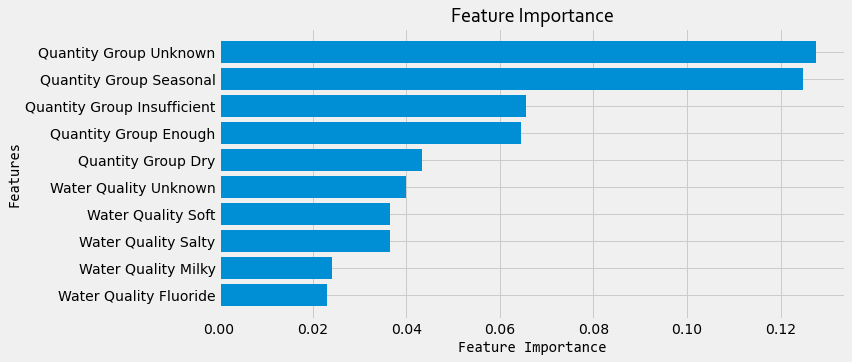

In [95]:
featureImportance(final_model)

### *Confusion Matrix Display*

The *confusion matrix* will be a table for a classification problem with three classes: `functional`, `functional needs repair`, and `non functional`. This confusion matrix will be used to evaluate the performance of a classification model and calculate various metrics like accuracy, precision, recall, and F1-score.

The *rows* represent the `Actual Labels`, while the *columns* represent the `Predicted Labels`. Each cell in the table shows the count of instances falling into a particular combination of predicted and actual labels.

For example, the value in the first row and first column (5478) represents the count of instances that were actually "functional" and were correctly predicted as "functional". Similarly, the value in the second row and third column (99) represents the count of instances that were actually "functional needs repair" but were falsely predicted as "non functional".

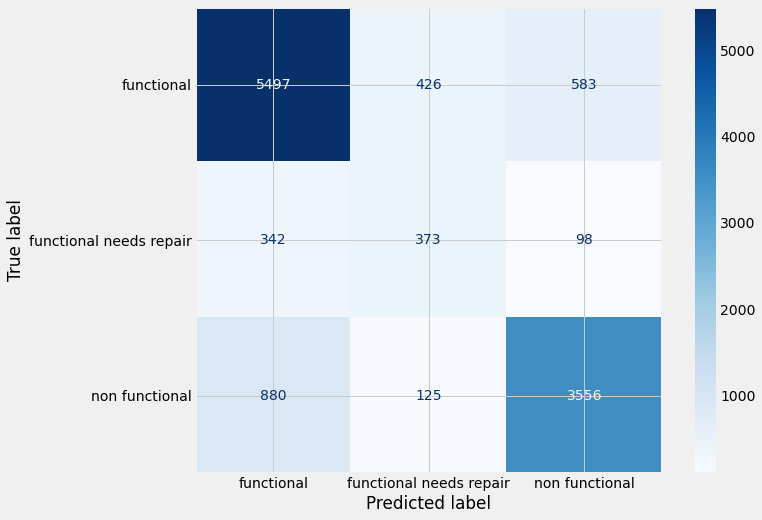

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cnf_matrix = confusion_matrix(y_test, y_test_pred)
display_labels = final_model.classes_

matrix = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=display_labels)
fig, ax = plt.subplots(figsize=(10, 8))
matrix.plot(cmap=plt.cm.Blues, ax=ax)
plt.show()

### *Explanation:*

<ul type='circle'> 
    <li><strong>TP (True Positive):</strong> The count of instances that are actually "functional" and are correctly predicted as "functional". In the matrix, it is represented by the value 5497.</li>
    <li><strong>TN (True Negative):</strong> The count of instances that are actually "functional needs repair" or "non functional" and are correctly predicted as either "functional needs repair" or "non functional". In the matrix, it includes the values 373 and 3556.</li>
    <li><strong>FP (False Positive):</strong> The count of instances that are actually "functional needs repair" or "non functional" but are falsely predicted as "functional". In the matrix, it includes the values 426, 98, and 125.</li>
    <li><strong>FN (False Negative):</strong> The count of instances that are actually "functional" but are falsely predicted as "functional needs repair" or "non functional". In the matrix, it includes the values 583, 373, and 880.</li>
</ul>

#### *Detailed Explanation*

<ul type='circle'>
   <li><strong>TP (functional, functional):</strong> 5497 instances are truly functional and are correctly predicted as functional.</li>
   <li><strong>TP (functional needs repair, functional needs repair):</strong> 376 instances are truly functional needs repair and are correctly predicted as functional needs repair.</li>
   <li><strong>TP (non functional, non functional):</strong> 3556 instances are truly non functional and are correctly predicted as non functional.</li>
   <li><strong>FP (functional needs repair, functional):</strong> 426 instances are actually functional needs repair but are falsely predicted as functional.</li>
   <li><strong>FP (non functional, functional):</strong> 583 instances are actually non functional but are falsely predicted as functional.</li>
   <li><strong>FN (functional, functional needs repair):</strong> 594 instances are truly functional but are falsely predicted as functional needs repair.</li>
   <li><strong>FN (functional, non functional):</strong> 880 instances are truly functional but are falsely predicted as non functional.</li>
   <li><strong>FN (functional needs repair, functional):</strong> 342 instances are truly functional needs repair but are falsely predicted as functional.</li>
   <li><strong>FN (functional needs repair, non functional):</strong> 98 instances are truly functional needs repair but are falsely predicted as non functional.</li>
   <li><strong>FN (non functional, functional):</strong> 125 instances are truly non functional but are falsely predicted as functional</li>
</ul>

## **Conclusion**

Our final classification model achieved an accuracy score of 0.7941, corresponding to approximately 79.41%. This means that the model accurately predicts the water pump functionality status 79.41% of the time. 

Furthermore, our analysis identified several important features that strongly influence the model's predictions. These key features include `permit`, `public_meeting`, `district_code`, `region_code`, `water_type`, and `source_class`. The stakeholders, such as the government of the United Republic of Tanzania, can utilize these findings to enhance their maintenance and repair operations for water pumps in the various locations where there are non funcitonal water pumps.

By considering these critical features, stakeholders can make informed decisions and take proactive measures to ensure efficient functionality of the water pump systems.